<a href="https://colab.research.google.com/github/rameez16/Machine-Learning/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYC Taxi Trip Time Prediction**    -



##### **Project Type**    - EDA/ Linear Regression
##### **Contribution**    - Individual
##### **Team Member 1 - Muhammed Ramees


# **Project Summary -**

The  **NYC Taxi Trip Duration**  Prediction project involves analyzing historical taxi trip data to develop a model that accurately forecasts trip durations. The dataset includes key features such as pickup and dropoff timestamps, geographic coordinates, passenger count, and trip vendor details. The project follows a structured approach, including data preprocessing, feature engineering, exploratory data analysis (EDA), and model selection. Various machine learning algorithms, such as linear regression, decision trees, and gradient boosting models, will be explored to optimize prediction accuracy.

---


***The insights from this project can be used to:***
1.  **Better Customer Experience**
Accurate Estimated Time of Arrival (ETA) builds trust with users. Apps like Uber and Lyft use duration models to inform riders even before the trip begins.

2. ** Dynamic Pricing / Fare Estimation**
Fare is often a function of time + distance. Predicting trip duration allows for better fare estimates, reducing customer complaints and improving transparency.

3. ** Route Optimization**
If predicted trip times are unusually high, systems can suggest alternate routes or reschedule rides to avoid delays and traffic hotspots.

4.  **Fleet & Driver Management**
Companies can allocate drivers based on predicted trip times, helping reduce idle time, fuel consumption, and driver fatigue — especially during rush hours or special events.

5.  **Operational Efficiency & Profitability**
Knowing how long trips take helps companies optimize:

Number of trips per driver/shift

Time between pickups

Fuel usage and maintenance planning

6. Fraud Detection
Unusual durations (either too short or too long for known routes) can flag suspicious behavior, such as detours or system errors. **bold text**

7.  Urban Planning & Traffic Insights
Aggregated trip duration data reveals congestion trends, traffic patterns, and helps city officials make informed decisions on infrastructure and road policies



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to develop a machine learning model to predict the trip duration of NYC taxi rides based on various factors such as pickup and dropoff locations, time of travel, number of passengers, and vendor details. Accurately predicting trip duration is crucial for optimizing taxi dispatch, enhancing passenger experience, improving route selection, and reducing idle time for drivers. By leveraging historical trip data, we aim to build a robust predictive model that can estimate travel times efficiently, benefiting both taxi operators and riders.

# Factors That might Affecting Taxi Trip Duration.
---

## 1. Traffic Conditions

- **Rush Hours** (7–10 AM and 4–7 PM) can significantly increase travel time.
- **Unexpected congestion** due to accidents, roadblocks, or construction zones.
- Special traffic rules in certain areas (e.g., bus-only lanes, restricted access streets).



## 2. Weather Conditions

- **Rain, snow, or fog** can slow down traffic.
- Poor visibility or slippery roads may make drivers more cautious, increasing trip duration.



## 3. Distance and Route

- Longer distances naturally lead to longer travel times.
- **One-way streets** and restricted zones can cause detours.
- Route choice (via highways, toll roads, or local streets) can impact duration.



## 4. Time of Day

- **Early morning or late-night** trips tend to be quicker due to lighter traffic.
- Daytime trips may experience more traffic congestion, especially near commercial zones.



## 5. Location Type

- Locations in **Midtown Manhattan** may have heavy traffic and limited parking.
- Areas in **Queens or Brooklyn** might have more manageable traffic but longer distances.
- Business districts often have more foot traffic and slower vehicle movement.



## 6. Taxi Type

- **Yellow cabs**, **Uber/Lyft**, and **private hires** may have different response times.
- Availability during peak hours may be limited, increasing wait time.
- Surge pricing or high demand might affect scheduling.



## 7. Delivery Load and Waiting Time

- More stops per route increase overall time.
- Delays may occur at each stop due to:
  - Security procedures
  - Waiting for elevators
  - Getting signatures or clearance



## 8. Day of the Week

- **Weekdays**: Heavier traffic and more operational offices.
- **Weekends**: Less traffic, but some destinations might be closed or operate on reduced hours.



## 9. Construction Work and Road Closures

- Constant road maintenance or emergency work in NYC.
- Might require unplanned detours that extend trip times.



## 10. Public Events and Holidays

- Events like parades, marathons, or street festivals may block streets.
- National holidays may cause office closures or reduce delivery frequency.



## 11. Use of Technology

- GPS and real-time traffic apps (like Google Maps or Waze) can help avoid congested routes.
- Lack of such tools might lead to inefficient routing and longer trips.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

## Import Libraries

In [124]:
# Import Libraries

# Core Data Handling
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import (StandardScaler, RobustScaler,
                                 MinMaxScaler, LabelEncoder)

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
from sklearn.cluster import KMeans  # For pickup/dropoff clusters

# Geospatial Calculations
from geopy.distance import great_circle  # Alternative distance method
import math  # For bearing calculations (atan2, degrees)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date/Time Handling
from datetime import datetime

# Advanced Models
from xgboost import XGBRegressor

# Utility
import warnings
warnings.filterwarnings('ignore')  # Cleaner output

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Copy of NYC Taxi Data.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1            -73.98            40.77             -73.96   
1                1            -73.98            40.74             -74.00   
2                1            -73.98            40.76             -74.01   
3                1            -74.01            40.72             -74.01   
4                1            -73.97            40.79             -73.97   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0             40.77                  N            455  
1             40.73                  N            663  
2             40.71                  N           2124  
3             40.71                  N            429  
4             40.78                  N            435

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(1458644, 11)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count 1458644.00       1458644.00        1458644.00       1458644.00   
mean        1.53             1.66            -73.97            40.75   
std         0.50             1.31              0.07             0.03   
min         1.00             0.00           -121.93            34.36   
25%         1.00             1.00            -73.99            40.74   
50%         2.00             1.00            -73.98            40.75   
75%         2.00             2.00            -73.97            40.77   
max         2.00             9.00            -61.34            51.88   

       dropoff_longitude  dropoff_latitude  trip_duration  
count         1458644.00        1458644.00     1458644.00  
mean              -73.97             40.75         959.49  
std                 0.07              0.04        5237.43  
min              -121.93             32.18           1.00  
25%               -73.99             40.74         397.00  
50%               -73.98             40.75         662.00  
75%               -73.96             40.77        1075.00  
max               -61.34             43.92     3526282.00

In [7]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()


np.int64(0)

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### What did you know about your dataset?

Total Rows: 1,458,644

Total Columns: 11

Missing Values: None

Duplicate Values : None

1,458,644 NYC taxi trips with 11 features and no missing and uplicate  values. It includes timestamps, passenger counts, pickup/drop-off locations, and trip durations. The goal is to predict trip duration using these features

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count 1458644.00       1458644.00        1458644.00       1458644.00   
mean        1.53             1.66            -73.97            40.75   
std         0.50             1.31              0.07             0.03   
min         1.00             0.00           -121.93            34.36   
25%         1.00             1.00            -73.99            40.74   
50%         2.00             1.00            -73.98            40.75   
75%         2.00             2.00            -73.97            40.77   
max         2.00             9.00            -61.34            51.88   

       dropoff_longitude  dropoff_latitude  trip_duration  
count         1458644.00        1458644.00     1458644.00  
mean              -73.97             40.75         959.49  
std                 0.07              0.04        5237.43  
min              -121.93             32.18           1.00  
25%               -73.99             40.74         397.00  
50%               -73.98             40.75         662.00  
75%               -73.96             40.77        1075.00  
max               -61.34             43.92     3526282.00

### Variables Description

1. id---	               Unique trip ID
2. vendor_id---	           ID of the taxi company (1 or 2)
3. pickup_datetime---	     Timestamp when the ride started
4. dropoff_datetime---	   Timestamp when the ride ended
5. passenger_count---	     Number of passengers in the taxi
6. pickup_longitude--	   Longitude of pickup location
7. pickup_latitude---	     Latitude of pickup location
8. dropoff_longitude---	   Longitude of drop-off location
9. dropoff_latitude---	   Latitude of drop-off location
10. store_and_fwd_flag---	 Whether the trip was stored and forwarded
11. trip_duration---	       Total duration of the trip in seconds

KEY OBSERVATION


---

1. vendor_id suggests two different taxi service providers.

2. trip_duration is the target variable (what we want to predict).

3. Pickup and drop-off locations allow us to calculate distances.





### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## 3. ***Data Wrangling***

#### Converting trip duration from seconds to mnts

In [13]:
# Write your code to make your dataset analysis ready.
## convert Trip duration in seconds to minits
df['trip_duration_in_mnts']=(df['trip_duration']/60).round(2)

df['trip_duration_in_mnts'].head(5)


0    7.58
1   11.05
2   35.40
3    7.15
4    7.25
Name: trip_duration_in_mnts, dtype: float64

#### duration statitics

In [14]:
print("Trip Duration Statistics (minutes):")
print(f"Mean: {df['trip_duration_in_mnts'].mean():.2f} minutes")
print(f"Median: {df['trip_duration_in_mnts'].median():.2f} minutes")
print(f"Standard Deviation: {df['trip_duration_in_mnts'].std():.2f} minutes")
print(f"Minimum: {df['trip_duration_in_mnts'].min():.2f} minutes")
print(f"Maximum: {df['trip_duration_in_mnts'].max():.2f} minutes")

Trip Duration Statistics (minutes):
Mean: 15.99 minutes
Median: 11.03 minutes
Standard Deviation: 87.29 minutes
Minimum: 0.02 minutes
Maximum: 58771.37 minutes


The average trip lasts approximately 15.99 minutes, while the median duration is 11.03 minutes, indicating that most rides are relatively short with a right-skewed distribution. The standard deviation of 87.29 minutes highlights the presence of significant variability, likely due to outliers or a few exceptionally long trips. With a minimum duration of just 0.02 minutes and a maximum exceeding 58,000 minutes, the data suggests the existence of anomalies or data entry issues, which may require further cleaning or investigation

#### Adding Pickup& Drop off Time Features

In [15]:
# Convert to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])


# Pickup Time Features
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday  # Monday=0, Sunday=6
df['pickup_hour'] = df['pickup_datetime'].dt.hour



# Dropoff Time Features (mirroring pickup)
df['dropoff_year'] = df['dropoff_datetime'].dt.year
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour



#### Calculate Haversine distance between pickup and dropoff

In [16]:
# Calculate Haversine distance between pickup and dropoff
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

df['distance_km'] = df.apply(lambda x: haversine(x['pickup_longitude'], x['pickup_latitude'],
                                                x['dropoff_longitude'], x['dropoff_latitude']), axis=1)

#### Distance Statitics

In [17]:
print("Distance Statistics (km):")
print(f"Mean: {df['distance_km'].mean():.2f} km")
print(f"Median: {df['distance_km'].median():.2f} km")
print(f"Standard Deviation: {df['distance_km'].std():.2f} km")
print(f"Minimum: {df['distance_km'].min():.2f} km")
print(f"Maximum: {df['distance_km'].max():.2f} km")

Distance Statistics (km):
Mean: 3.44 km
Median: 2.09 km
Standard Deviation: 4.29 km
Minimum: 0.00 km
Maximum: 1240.13 km


The distance analysis of taxi trips reveals a mean travel distance of 3.44 km with a median of 2.09 km, indicating that most rides are short-distance, urban commutes. The standard deviation of 4.29 km shows moderate variability, while the maximum distance of 1240.13 km suggests the presence of outliers or data anomalies. A minimum of 0.00 km further highlights the need for careful data validation.

#### Average speed per trip in kilometers per hour

In [18]:
df['speed_kmh']=(df['distance_km']/df['trip_duration_in_mnts'])*60


In [19]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_in_mnts', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_weekday', 'pickup_hour', 'dropoff_year',
       'dropoff_month', 'dropoff_day', 'dropoff_weekday', 'dropoff_hour',
       'distance_km', 'speed_kmh'],
      dtype='object')

In [20]:
df.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1            -73.98            40.77             -73.96   
1                1            -73.98            40.74             -74.00   
2                1            -73.98            40.76             -74.01   
3                1            -74.01            40.72             -74.01   
4                1            -73.97            40.79             -73.97   

   dropoff_latitude store_and_fwd_flag  ...  pickup_day  pickup_weekday  \
0             40.77                  N  ...          14               0   
1             40.73                  N  ...          12               6   
2             40.71                  N  ...          19               1   
3             40.71                  N  ...           6               2   
4             40.78                  N  ...          26               5   

   pickup_hour  dropoff_year  dropoff_month  dropoff_day  dropoff_weekday  \
0           17          2016              3           14                0   
1            0          2016              6           12                6   
2           11          2016              1           19                1   
3           19          2016              4            6                2   
4           13          2016              3           26                5   

   dropoff_hour  distance_km  speed_kmh  
0            17         1.50      11.85  
1             0         1.80       9.80  
2            12         6.38      10.82  
3            19         1.48      12.46  
4            13         1.19       9.83  

[5 rows x 24 columns]

### What all manipulations have you done and insights you found?

Added speed and distance features. Created  trip duration in minites column for better interpretability. Crated day,month,weekday columns for drop off and pickup for detailed analysis.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **UNIVARIATE ANALYSIS**

#### 1.TRIP DURATION- BOX PLOT

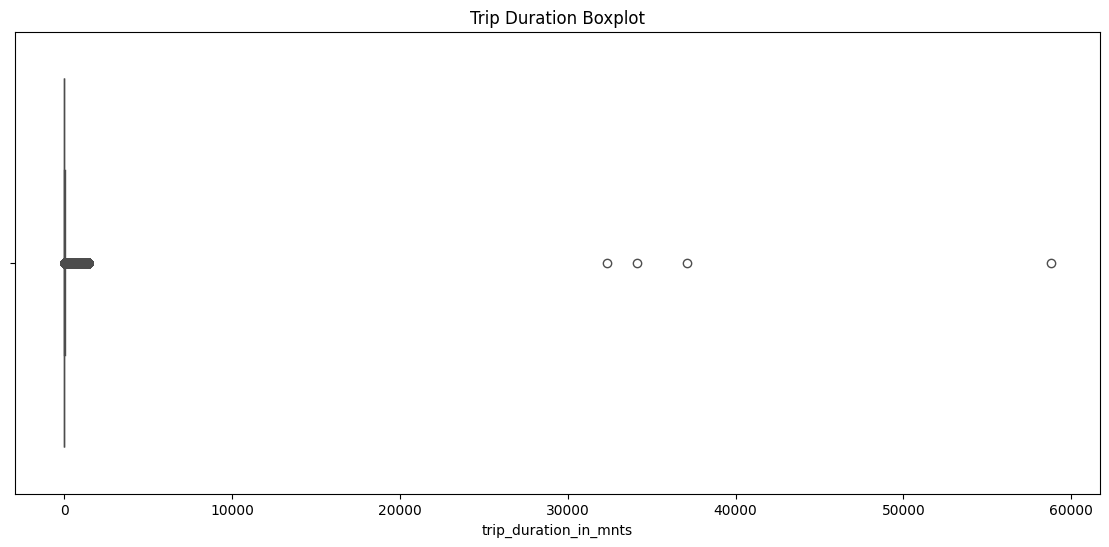

In [21]:
# Boxplot
plt.figure(figsize=(14,6))
sns.boxplot(x=df['trip_duration_in_mnts'], color='orange')
plt.title("Trip Duration Boxplot")
plt.show()

Box plot is hardly interpretable due to very large outliers. so let us filter the trip duration to under 120 minites

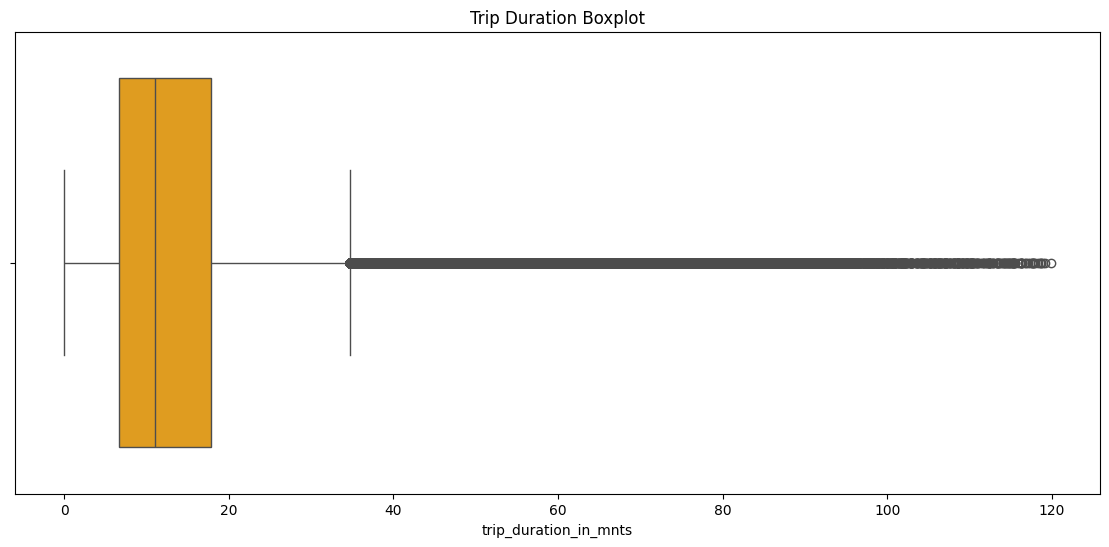

In [22]:

df_filtered_duration=df[df['trip_duration_in_mnts']<120]

plt.figure(figsize=(14,6))
sns.boxplot(x=df_filtered_duration['trip_duration_in_mnts'], color='orange')
plt.title("Trip Duration Boxplot")
plt.show()

Most trips are very short suggessting typical city rides.

The box spans approximately from ~7 to ~20 minutes, meaning.50% of trips are between 7 and 20 minutes.The line inside the box is around 10–12 minutes, so:
Half of all trips take less than ~12 minutes.Many Outliers are clustered between 35–120 mins (maybe airport runs, traffic, etc.).

#### 1.TRIP DURATION- HISTOGRAM

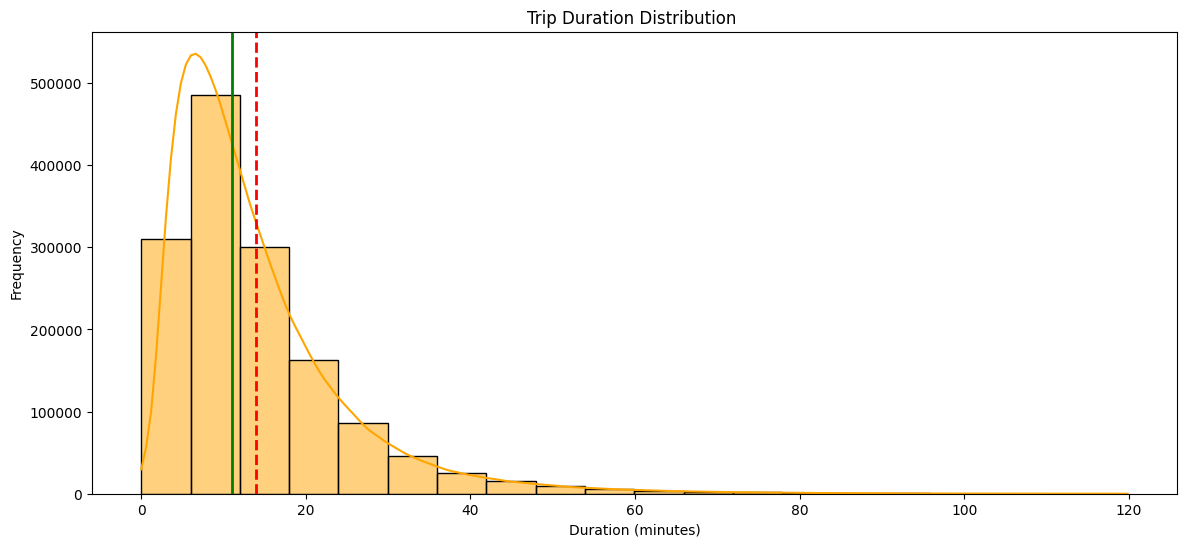

In [23]:
import numpy as np

mean_duration = df_filtered_duration['trip_duration_in_mnts'].mean()
median_duration = df_filtered_duration['trip_duration_in_mnts'].median()




plt.figure(figsize=(14,6))
sns.histplot(df_filtered_duration['trip_duration_in_mnts'], bins=20, kde=True, color='orange')

plt.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_duration:.2f}')
plt.axvline(median_duration, color='green', linestyle='-', linewidth=2, label=f'Median: {median_duration:.2f}')


plt.title("Trip Duration Distribution ")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

 The distribution is right-skewed, indicating that while most trips are short, a small number of longer trips stretch the tail to the right.

#### Group trip_duration into 10-minute bins (600 seconds each)

<ipython-input-24-ba932952c0bb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_counts = df.trip_duration.groupby(trip_bins).count()


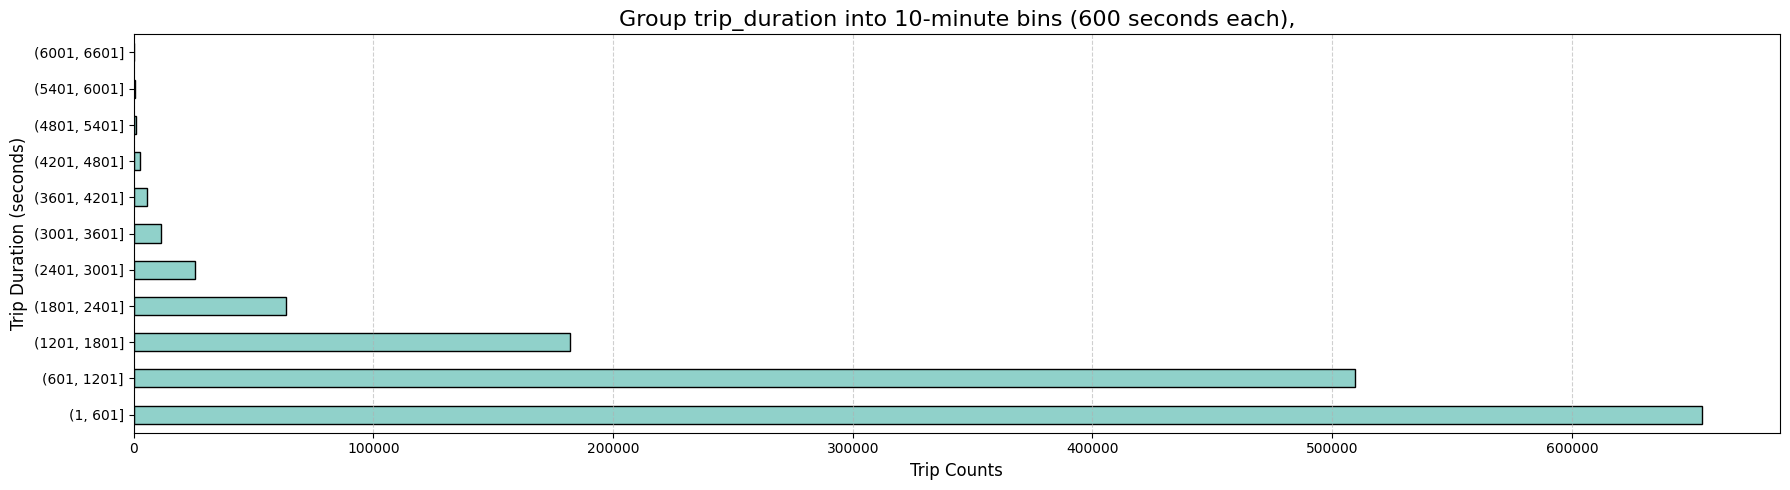

In [24]:
# Group and count durations in 10-min bins
trip_bins = pd.cut(df.trip_duration, np.arange(1, 7200, 600))
trip_counts = df.trip_duration.groupby(trip_bins).count()

# Create horizontal bar plot
colors = plt.cm.viridis(np.linspace(0, 1, len(trip_counts)))

trip_counts.plot(
    kind='barh',
    figsize=(18, 5),
    color='#90D1CA',
    edgecolor='black'
)

plt.title('Group trip_duration into 10-minute bins (600 seconds each),', fontsize=16)
plt.xlabel('Trip Counts', fontsize=12)
plt.ylabel('Trip Duration (seconds)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs.

Now Lets Creates bins from 1 second up to the maximum trip duration, with steps of 3600 seconds (i.e., 1 hour).

In [25]:
trip_duration_groups=df.trip_duration.groupby(
    pd.cut(df.trip_duration, np.arange(1, max(df.trip_duration), 3600))
).count()

trip_duration_groups

<ipython-input-25-63c5a2da4dc2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_duration_groups=df.trip_duration.groupby(


trip_duration
(1, 3601]             1446313
(3601, 7201]            10045
(7201, 10801]             141
(10801, 14401]             35
(14401, 18001]              5
                       ...   
(3506401, 3510001]          0
(3510001, 3513601]          0
(3513601, 3517201]          0
(3517201, 3520801]          0
(3520801, 3524401]          0
Name: trip_duration, Length: 979, dtype: int64

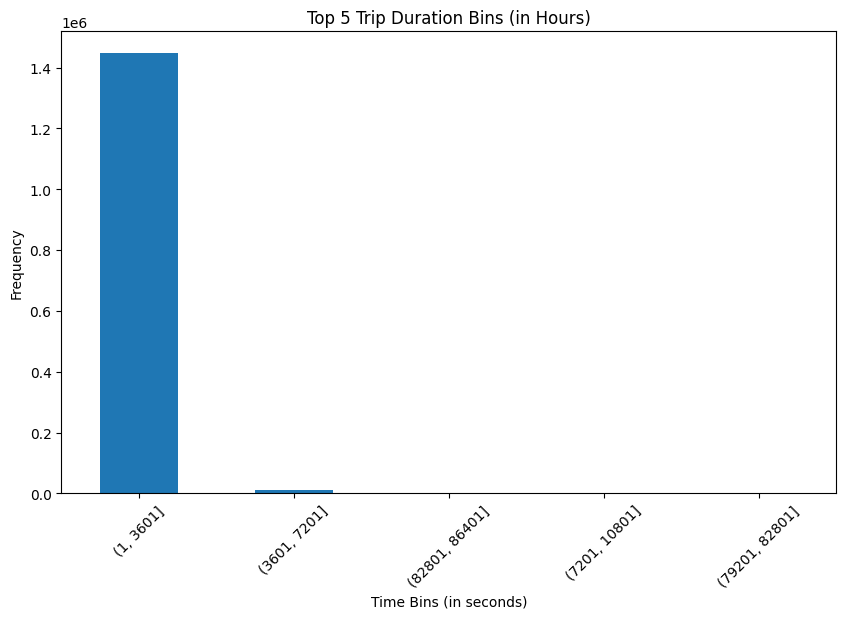

In [26]:
top_5_bins = trip_duration_groups.sort_values(ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5_bins.plot(kind='bar')
plt.title('Top 5 Trip Duration Bins (in Hours)')
plt.xlabel('Time Bins (in seconds)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### **So its very clear that most trip duration occured below 1hr**

### 2.VENDOR ID COMAPRISON

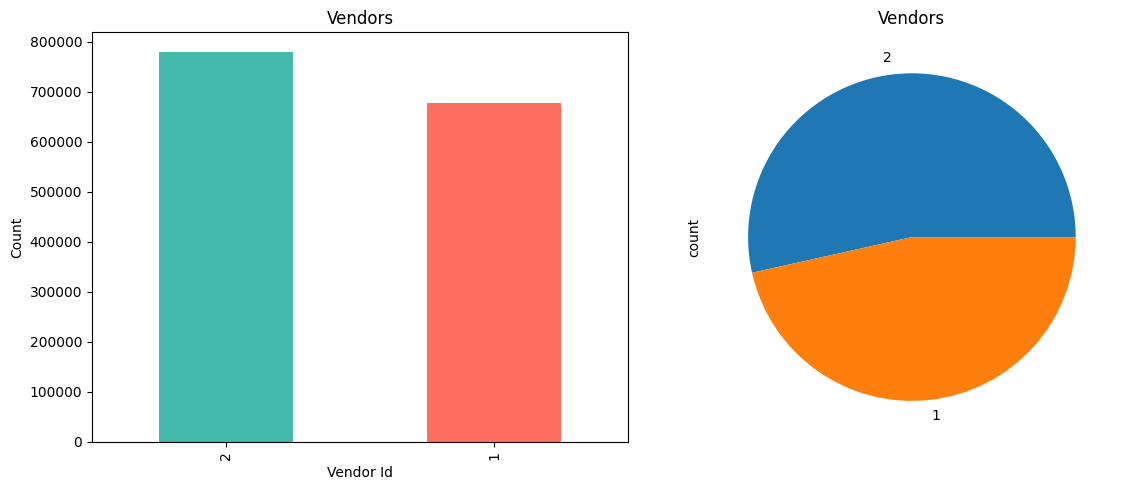

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax1 = df['vendor_id'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0],color=['#45B8AC', '#FF6F61'] )
ax2=df['vendor_id'].value_counts().plot(kind='pie',title="Vendors",ax=axes[1],color = ['#B39EB5', '#FFB347'])
ax1.set_ylabel("Count")
ax1.set_xlabel("Vendor Id")
fig.tight_layout()

There are only 2 venders(1 and 2)
Both the venders share almost equal amount of trips, the difference is quite low between two venders
But Vendor 2 is evidently more famous among the population as per the above graphs.

### 3.Passenger Count- Bar & Pie Plot

In [28]:
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
df.passenger_count.value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

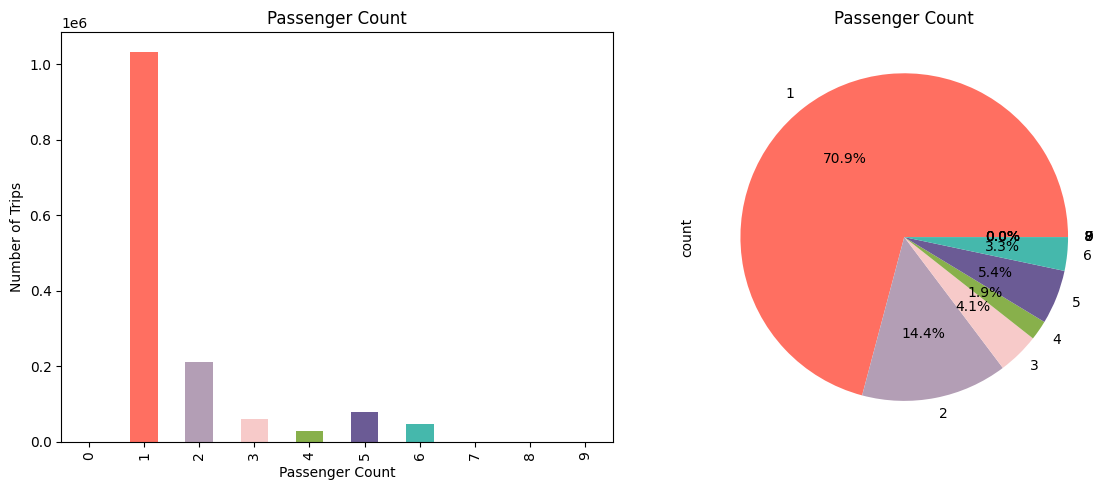

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar Chart
ax = df['passenger_count'].value_counts().sort_index().plot(
    kind='bar',
    title='Passenger Count',
    ax=axes[0],
    color=['#45B8AC', '#FF6F61', '#B39EB5', '#F7CAC9', '#88B04B', '#6B5B95']
)
ax.set_xlabel("Passenger Count")
ax.set_ylabel("Number of Trips")

# Pie Chart
df['passenger_count'].value_counts().sort_index().plot(
    kind='pie',
    title='Passenger Count',
    ax=axes[1],
    autopct='%1.1f%%',
    colors=['#45B8AC', '#FF6F61', '#B39EB5', '#F7CAC9', '#88B04B', '#6B5B95']
)

fig.tight_layout()

There are some trips with 0 passenger count.
Few trips consisted of even 6, 7, 8 or 9 passengers. Clear outliers and pointers to data inconsistency
Most of trip consist of passenger either 1 or 2.

#### 4. Trip Distance Analysis

<Axes: xlabel='distance_km'>

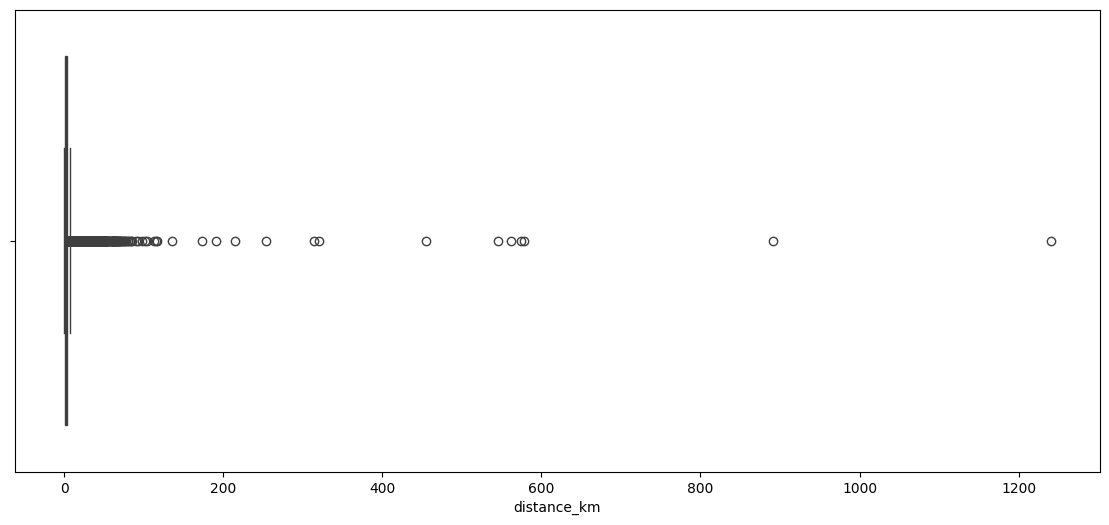

In [30]:
plt.figure(figsize=(14,6))
sns.boxplot(x=df['distance_km'])

box seems to be crammed to zero meaining trips distance are near to zero with huge outliers( some distance nearing 6ookm to 1200 km ,very unlikely for nyc taxi trips ) distorting the output.initial observation suggest that most trips may be in the range 0-20 km , lets examin this further by removing the outlier for analysis.lets put a filter in the range 0-100km.

In [31]:
df_filtered_distance=df[df['distance_km']<100]

<Axes: xlabel='distance_km'>

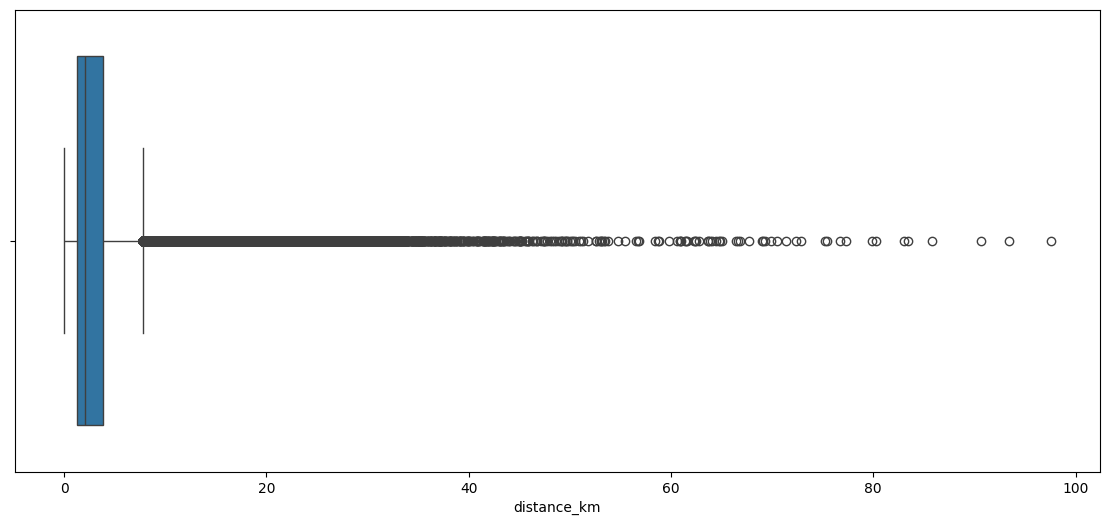

In [32]:
plt.figure(figsize=(14,6))
sns.boxplot(x=df_filtered_distance['distance_km'])

It appears that a significant number of trips fall within the 0–10 km range, with 50% of the trip distances concentrated between 1 and 4 km. To gain more clarity on this distribution, let's compute the mean and median trip distances."



In [33]:

df_filtered_distance['distance_km'].describe()

count   1458625.00
mean          3.43
std           3.94
min           0.00
25%           1.23
50%           2.09
75%           3.87
max          97.52
Name: distance_km, dtype: float64

### Approximately 75% of trips cover a distance of less than 4 km, with the mean distance being around 3.43 km. It's important to note that these distances are calculated as straight-line (point-to-point) measurements. In real-world scenarios, actual travel paths may be longer due to road layouts, traffic, and other factors—so this should be taken into account when interpreting these distance statistics."

In [34]:
len(df[df['distance_km']==0])

5897

There are **5816** trip records where the recorded distance is zero. This could be due to several reasons:

* The customer canceled the ride immediately after booking.

* A technical issue prevented the system from recording the drop-off location, resulting in it being the same as the pickup point.

* A GPS tracking error may have occurred during or at the end of the trip.

#### lets plot a horizontal graph with distance cuts to bins of 10km

<ipython-input-35-e445552dd410>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.distance_km.groupby(pd.cut(df.distance_km, np.arange(0,200,10))).count().plot(kind='barh',figsize = (19,4))


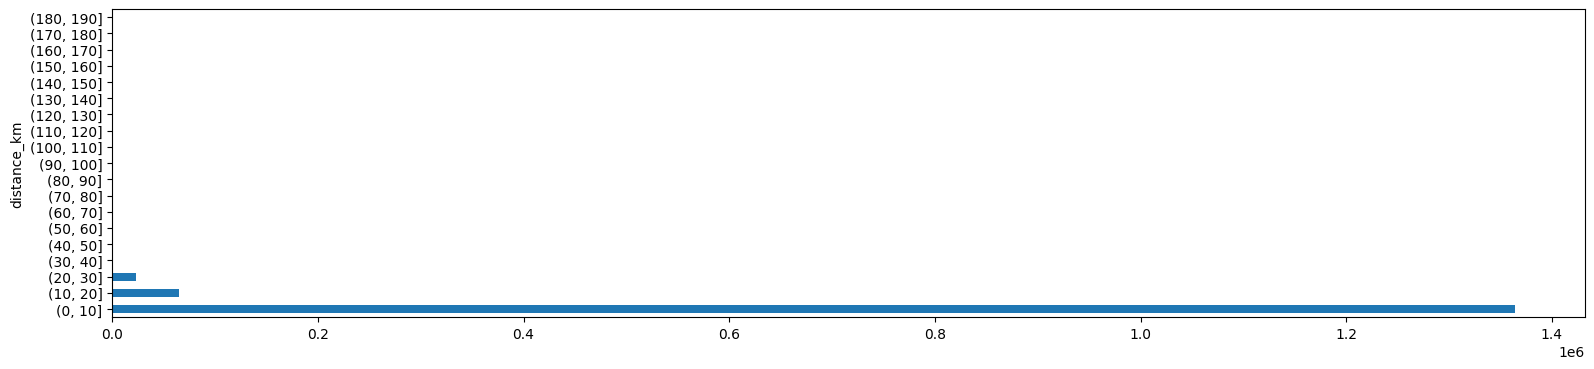

In [35]:
df.distance_km.groupby(pd.cut(df.distance_km, np.arange(0,200,10))).count().plot(kind='barh',figsize = (19,4))
plt.show()

From the above observation it is evident that most of the rides are completed between 1-10 km with some of the rides with distances between 10-30 km. Other slabs bar are not visible because the number of trips are very less as compared to these slabs

#### 5. Trip Speed Analysis

<ipython-input-36-bff5930da0bf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.speed_kmh.groupby(pd.cut(df.speed_kmh, np.arange(0,200,10))).count().plot(kind = 'barh',figsize = (19,5))


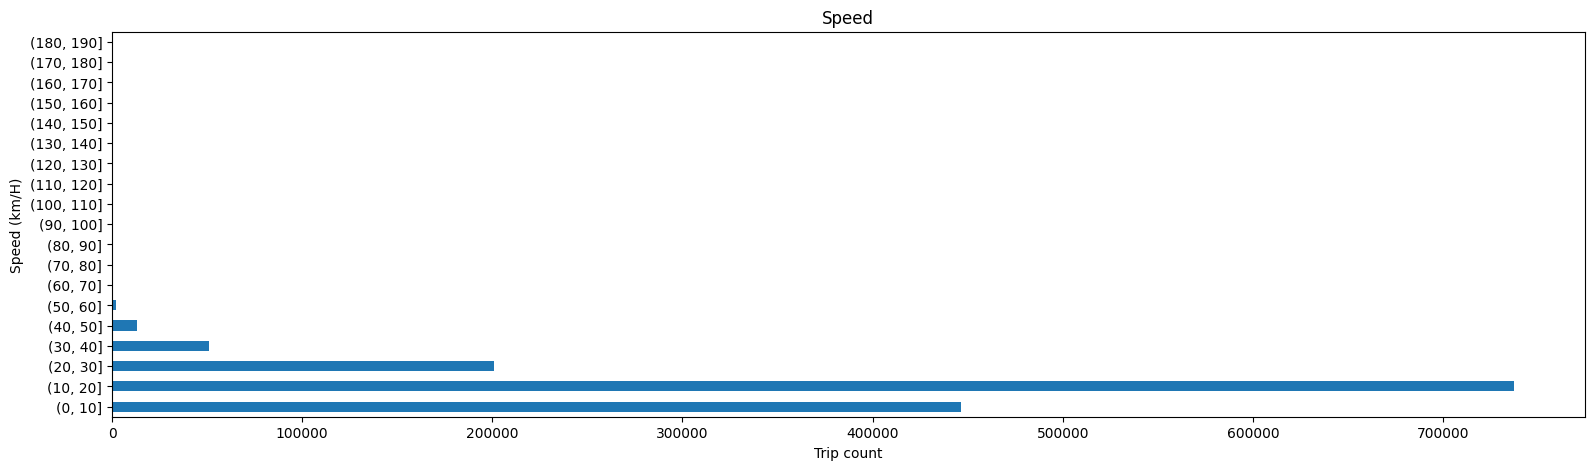

In [36]:

df.speed_kmh.groupby(pd.cut(df.speed_kmh, np.arange(0,200,10))).count().plot(kind = 'barh',figsize = (19,5))
plt.xlabel('Trip count')
plt.ylabel('Speed (km/H)')
plt.title('Speed')
plt.show()

speed range of 10 km/hr to 20 km/hr  dominate the data. and speed beyond 60 km/hr is rare

#### Chart - 9

## Bivariate Analysis

In [118]:
import pandas as pd
import matplotlib.pyplot as plt


trip_by_hour = df.groupby('pickup_hour')['trip_duration'].agg(['mean', 'median', 'count'])

print(trip_by_hour)

              mean  median  count
pickup_hour                      
0           781.05  646.00  52907
1           739.83  613.00  38308
2           701.69  591.00  27801
3           703.30  592.00  20735
4           735.27  611.50  15650
5           713.49  519.00  14896
6           671.81  474.00  33082
7           758.78  575.00  55321
8           835.00  661.00  66674
9           844.01  680.00  67321
10          848.40  680.00  65086
11          876.16  703.00  68077
12          878.33  707.00  71438
13          897.43  710.00  71038
14          946.92  726.00  73839
15          965.74  719.00  71333
16          963.86  695.00  63892
17          931.33  701.00  76032
18          860.69  687.00  90064
19          790.52  648.50  89812
20          768.83  634.00  83614
21          776.74  642.00  83684
22          805.06  668.00  80010
23          812.58  670.00  69377


1.(PICK UP HOUR) VS (TRIP DURATION)

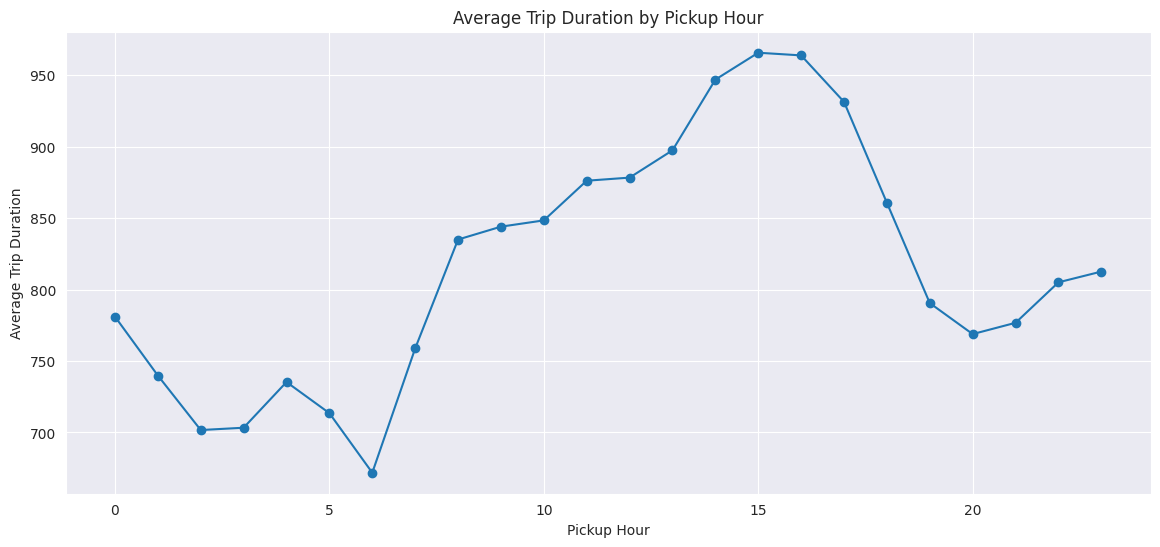

In [117]:
weekday_avg = df.groupby('pickup_hour')['trip_duration'].mean()

# Plot the results
plt.figure(figsize=(14,6))
plt.plot(weekday_avg.index, weekday_avg.values, marker='o')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Pickup Hour')
plt.grid(True)
plt.show()

2.(PICK UP WEEKDAY ) VS (TRIP DURATION)

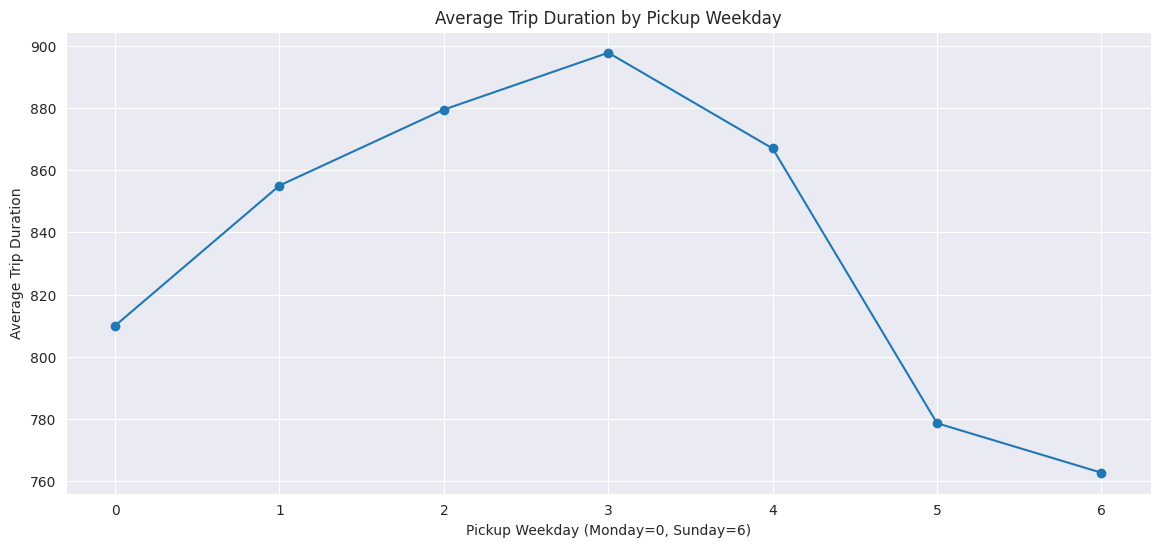

In [116]:
weekday_avg = df.groupby('pickup_weekday')['trip_duration'].mean()

# Plot the results
plt.figure(figsize=(14,6))
plt.plot(weekday_avg.index, weekday_avg.values, marker='o')
plt.xlabel('Pickup Weekday (Monday=0, Sunday=6)')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Pickup Weekday')
plt.grid(True)
plt.show()

3.(PICK UP MONTH) VS (TRIP DURATION)

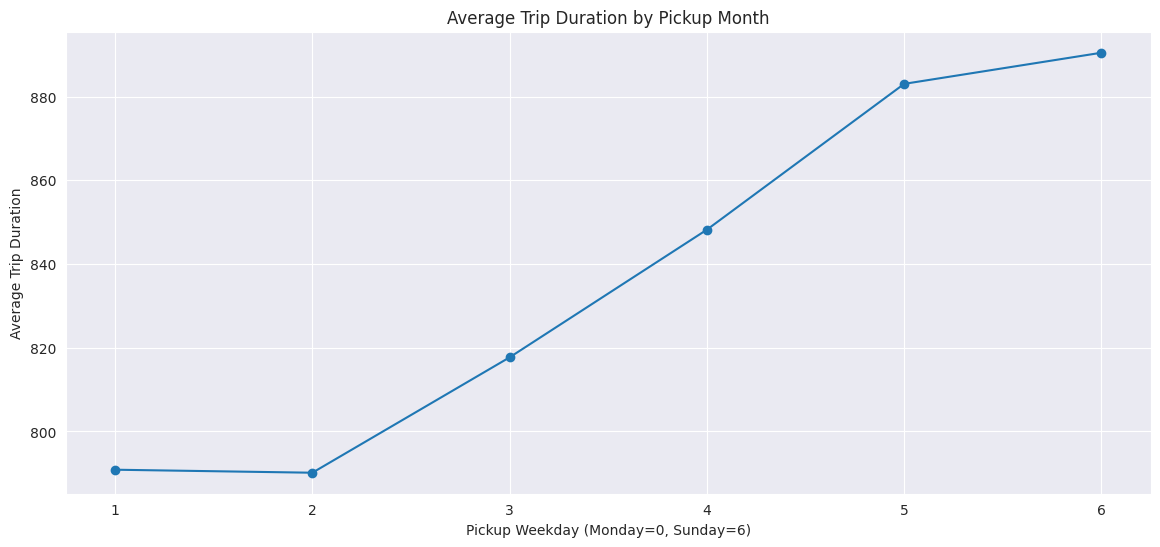

In [115]:
weekday_avg = df.groupby('pickup_month')['trip_duration'].mean()

# Plot the results
plt.figure(figsize=(14,6))
plt.plot(weekday_avg.index, weekday_avg.values, marker='o')
plt.xlabel('Pickup Weekday (Monday=0, Sunday=6)')
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Pickup Month')
plt.grid(True)
plt.show()

4. SPEED VS PICKUP HOUR

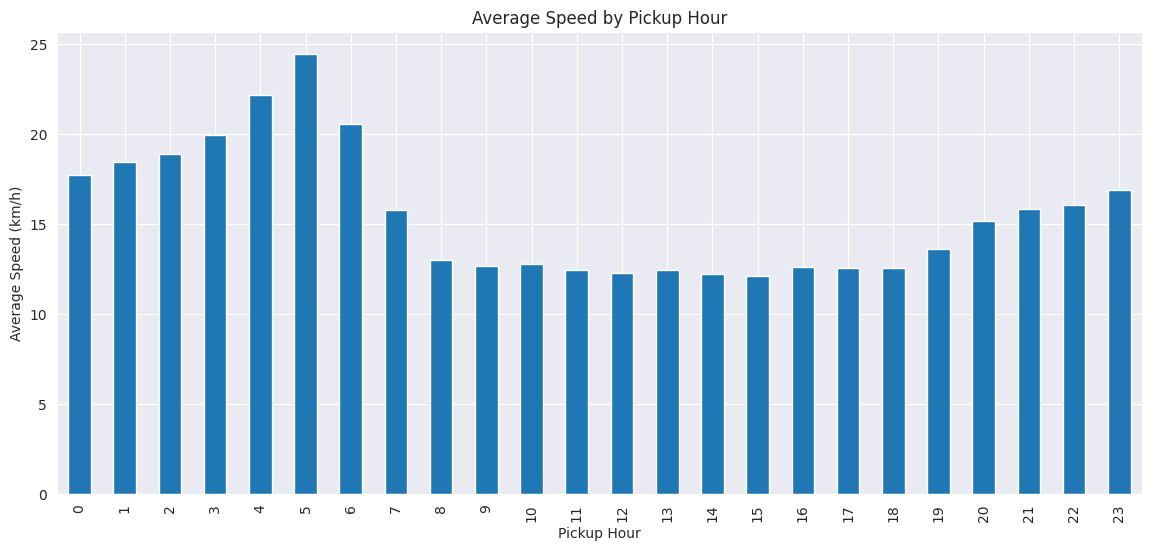

In [113]:
speed_by_hour = df.groupby('pickup_hour')['speed_kmh'].mean()

plt.figure(figsize=(14, 6))
speed_by_hour.plot(kind='bar')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Speed (km/h)')
plt.title('Average Speed by Pickup Hour')
plt.show()

TRIP DISTANCE VS PICKUP HOUR

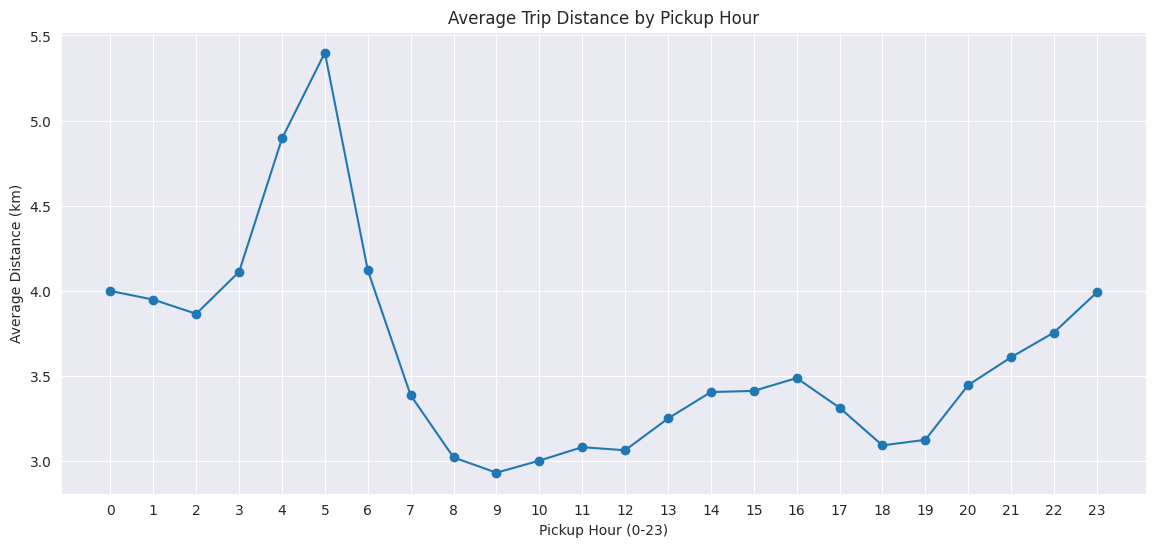

In [114]:
# Group by pickup_hour and calculate the mean distance
hourly_distance = df.groupby('pickup_hour')['distance_km'].mean()

# Plot the results
plt.figure(figsize=(14,6))
plt.plot(hourly_distance.index, hourly_distance.values, marker='o')
plt.xlabel('Pickup Hour (0-23)')
plt.ylabel('Average Distance (km)')
plt.title('Average Trip Distance by Pickup Hour')
plt.xticks(range(0, 24))  # To show all hours on the x-axis
plt.grid(True)
plt.show()

## Scatter plot (trip duration in mintes vs distance in km)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


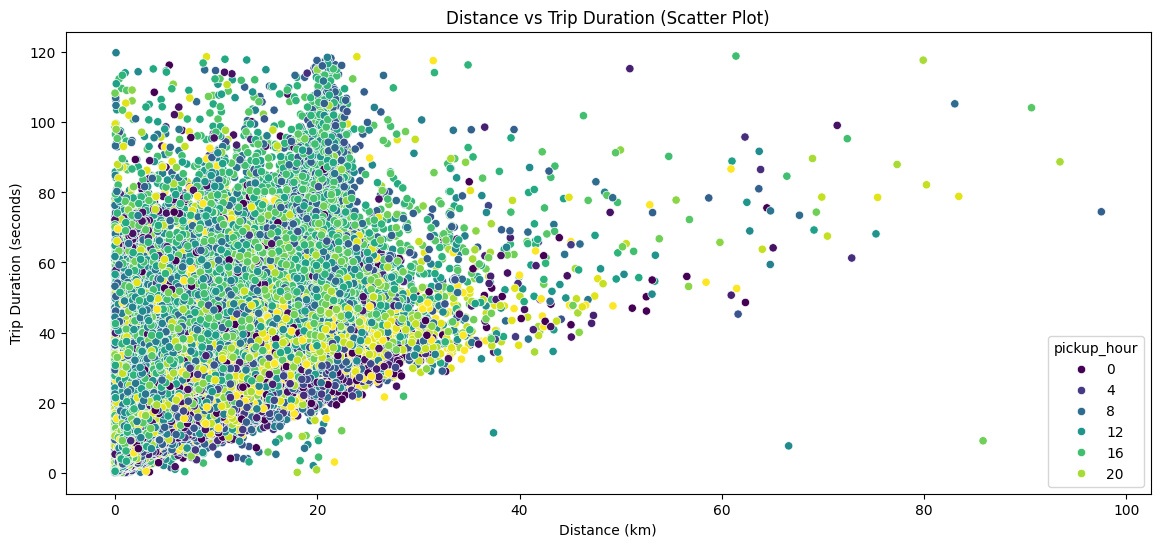

In [43]:
df_flt= df[(df['trip_duration_in_mnts']<120) & (df['distance_km']<100)]

plt.figure(figsize=(14,6))
sns.scatterplot(data=df_flt, x="distance_km", y="trip_duration_in_mnts", hue="pickup_hour", palette="viridis")
plt.title("Trip Distance vs Trip Duration")
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (seconds)')
plt.title('Distance vs Trip Duration (Scatter Plot)')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


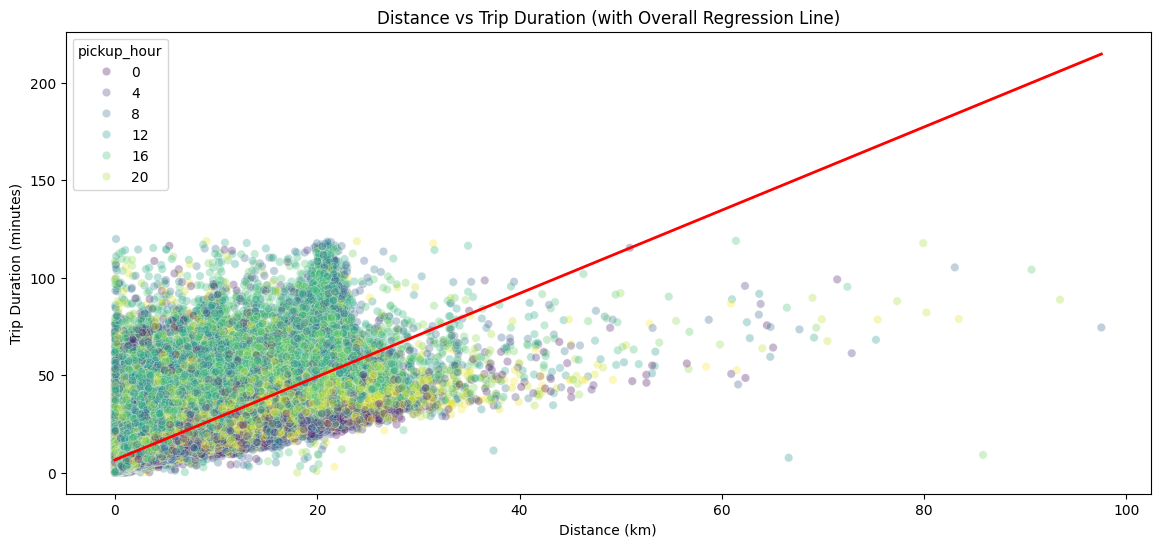

In [44]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_flt, x="distance_km", y="trip_duration_in_mnts", hue="pickup_hour", palette="viridis", alpha=0.3)
sns.regplot(data=df_flt, x="distance_km", y="trip_duration_in_mnts", scatter=False, color='red', line_kws={"linewidth": 2})
plt.title("Distance vs Trip Duration (with Overall Regression Line)")
plt.xlabel("Distance (km)")
plt.ylabel("Trip Duration (minutes)")
plt.show()

1. ####  Positive Correlation
   - There is a general upward trend — **longer trips take more time**, as expected.
   - However, there's significant **spread**, indicating variability due to:
     - Traffic conditions
     - Route choices
     - Passenger stops or delays

2. ####  Clustering at Short Distances
   - Most trips are **less than 20 km**.
   - These trips generally last between **10 to 40 minutes**.
   - Dense clustering suggests urban travel patterns with frequent short-distance commutes.

3. ####  Outliers
   - **Long durations for short distances** (e.g., 1–5 km taking over 80 minutes):
     - Likely due to traffic jams, waiting time, or data errors.
   - **Short durations for long distances** (e.g., 60+ km in under 30 minutes):
     - Possibly due to highway usage or data anomalies.

4. ####  Pickup Hour Distribution
   - Color indicates pickup hour (e.g., 0, 4, 8, 12, 16, 20).
   - No strong visual pattern by hour, but:
     - Morning and evening hours may reflect traffic peaks.
     - Further exploration needed for hour-specific trends.



## Heatmap Analysis: Correlation Between Features

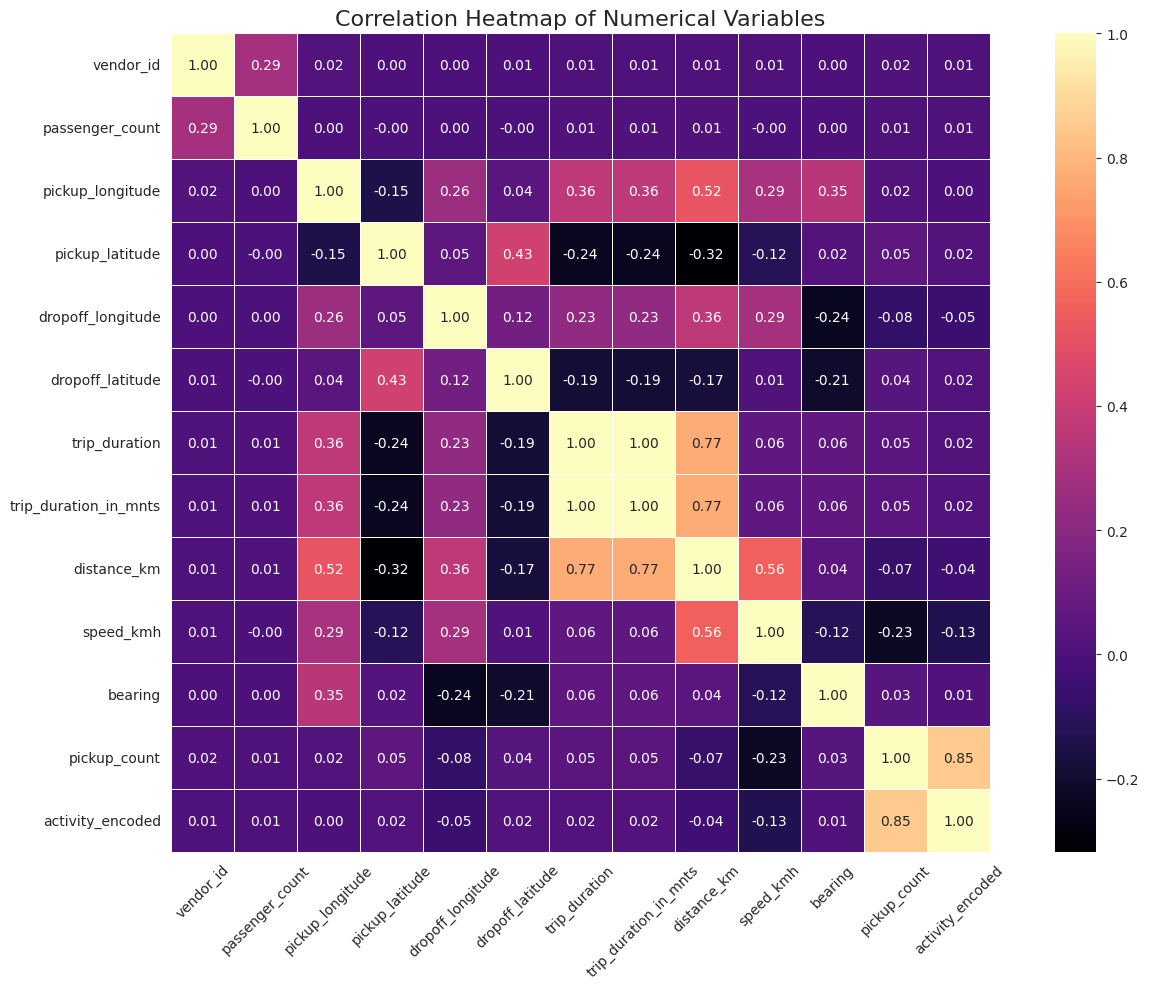

In [123]:

df_flt= df[(df['trip_duration_in_mnts']<120) & (df['distance_km']<100)]
# Select only numerical columns

numeric_df = df_flt.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,       # Display correlation values
    fmt=".2f",        # Format to 2 decimal places
    cmap='magma',  #
    linewidths=0.5,
    square=True
)

plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlation Heatmap Analysis   
*Trip Duration < 120 mins & Distance < 100 km*


---


### 1. **Trip Duration & Distance (km)**
- **Correlation**: `0.77`
- Strong positive correlation: longer distances are associated with longer trip durations.
- Filtering has strengthened this relationship.

### 2. **Trip Duration & Trip Duration in Minutes**
- **Correlation**: `1.00`
- Perfect correlation due to unit conversion — essentially the same variable.

### 3. **Distance (km) & Speed (km/h)**
- **Correlation**: `0.39`
- Moderate positive correlation: longer trips tend to have slightly higher average speeds, possibly due to more express routes.

### 4. **Pickup & Dropoff Coordinates**
- **Pickup Longitude & Dropoff Longitude**: `0.80`
- **Pickup Latitude & Dropoff Latitude**: `0.51`
- Indicates trips follow a general east-west direction (longitudinal alignment), with moderate north-south variation.

### 5. **Coordinates & Trip Duration**
- Slight positive correlation with longitude
- Slight negative correlation with latitude  
These values imply that trips starting further west or north may be marginally longer.

### 6. **Vendor ID & Passenger Count**
- **Correlation**: `0.29`
- Suggests slight operational or customer-type differences between vendors (e.g., group rides).

### 7. **Speed & Trip Duration**
- **Correlation**: `0.04`
- Very weak relationship — possibly due to influence from factors like traffic signals, congestion, and stops.

---

##  Summary Table

| Variable Pair                          | Correlation | Interpretation                                      |
|---------------------------------------|-------------|-----------------------------------------------------|
| `trip_duration` & `distance_km`       | **0.77**    | Strong link — longer trips take longer time.        |
| `trip_duration` & `trip_duration_in_mnts` | **1.00** | Perfect correlation (same variable, different unit).|
| `distance_km` & `speed_kmh`           | **0.39**    | Longer trips have slightly higher speeds.           |
| `pickup_longitude` & `dropoff_longitude` | **0.80** | Trips occur mostly east-west.                       |
| `pickup_latitude` & `dropoff_latitude` | **0.51**  | Moderate north-south movement.                      |
| `speed_kmh` & `trip_duration`         | **0.04**    | Weak relation — traffic and stops may interfere.    |

---


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing or duplicate values in dataset

### 2. Handling Outliers

In [46]:
# Handling Outliers & Outlier treatments

# 1. Remove trips with zero or negative trip duration
df = df[df['trip_duration'] > 0]

# 2. Remove trips with trip duration above 2hr threshold
df = df[df['trip_duration_in_mnts'] <= 120]

# 3. Remove trips with zero or unrealistic passenger counts (e.g., >6)
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

# 4. Filter latitude and longitude to NYC bounds (example for NYC)
lat_min, lat_max = 40.5, 41.0
lon_min, lon_max = -74.5, -73.5

df = df[(df['pickup_latitude'].between(lat_min, lat_max)) &
        (df['dropoff_latitude'].between(lat_min, lat_max)) &
        (df['pickup_longitude'].between(lon_min, lon_max)) &
        (df['dropoff_longitude'].between(lon_min, lon_max))]

# 5. Remove trips with zero or unrealistic distance (e.g., above 100 km)
df = df[(df['distance_km'] > 0) & (df['distance_km'] <= 100)]

# 6. Remove trips with unrealistic speed (e.g., > 150 km/h)
df = df[(df['speed_kmh'] > 0) & (df['speed_kmh'] <= 150)]

# 7. Remove rows where dropoff datetime is before pickup datetime
df = df[df['dropoff_datetime'] >= df['pickup_datetime']]



##### What all outlier treatment techniques have you used and why did you use those techniques?

1. **Removal of Zero or Negative Trip Durations**: Trips with zero or negative durations are removed to eliminate data entry errors or unrealistic values that could distort analysis.

2. **Filtering by Trip Duration**: Trips exceeding a 2-hour duration are excluded to focus on typical trip lengths and avoid outliers that may result from data anomalies.

3. **Passenger Count Constraints**: Trips with zero or unrealistic passenger counts (e.g., greater than six) are filtered out to maintain data integrity and reflect realistic scenarios.

4. **Geographical Boundaries**: Latitude and longitude are constrained to New York City bounds to ensure that the data pertains to the intended geographic area, removing outliers from irrelevant locations.

5. **Distance Thresholding**: Trips with zero or unrealistic distances (e.g., above 100 km) are removed to focus on typical trip distances and eliminate data errors.

6. **Speed Constraints**: Trips with unrealistic speeds (e.g., above 150 km/h) are excluded to remove data points that may result from inaccuracies or exceptional circumstances.

7. **Temporal Consistency Check**: Rows where the dropoff datetime is before the pickup datetime are removed to ensure logical consistency in the data.

These techniques collectively aim to clean the dataset by removing or correcting outliers that could skew analyses and lead to misleading conclusions.

### 3. Textual Data Preprocessing
(No textual data so i am skipping this step)

#### 1. Expand Contraction

In [47]:
# Expand Contraction

#### 2. Lower Casing

In [48]:
# Lower Casing

#### 3. Removing Punctuations

In [49]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [50]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [51]:
# Remove Stopwords

In [52]:
# Remove White spaces

#### 6. Rephrase Text

In [53]:
# Rephrase Text

#### 7. Tokenization

In [54]:
# Tokenization

#### 8. Text Normalization

In [55]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [56]:
# POS Taging

#### 10. Text Vectorization

In [57]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. # Manipulate Features to minimize feature correlation and create new features


### 1.  **Understanding Travel Direction Impact  ( Bearing Calculation )**
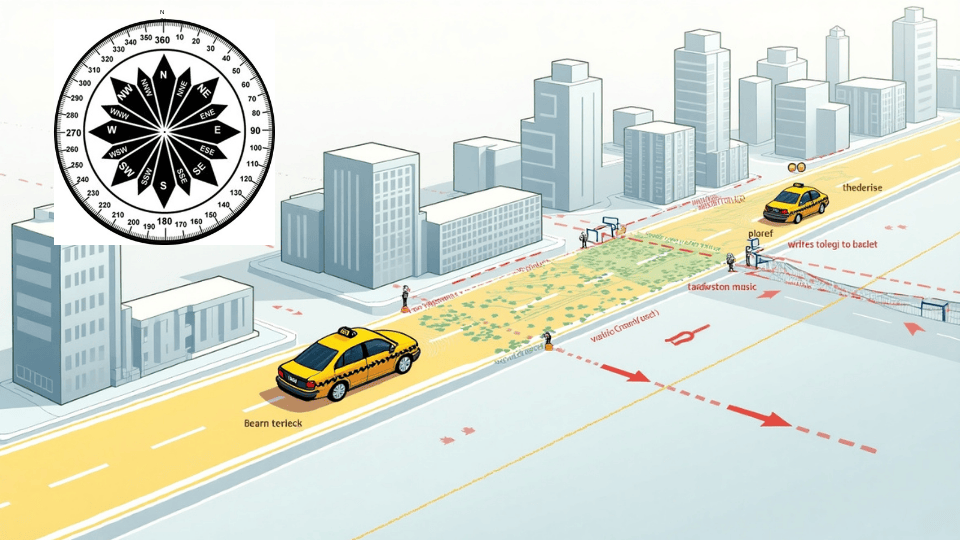

#### **Key Insights**:  
- **Congestion Asymmetry**: Trips toward business districts (e.g., 90° East in morning rush) often take longer.  
- **Geographic Barriers**: Bridges, hills, or one-way systems create direction-specific delays.  
- **Weather Effects**: Headwinds or weather-prone routes (e.g., coastal roads) may slow certain

In [59]:
def calculate_bearing(lat1, lon1, lat2, lon2):
    """
    Calculates the compass bearing between two points.
    Returns bearing in degrees (0 to 360).
    """
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    delta_lon = np.radians(lon2 - lon1)

    x = np.sin(delta_lon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - \
        np.sin(lat1) * np.cos(lat2) * np.cos(delta_lon)

    initial_bearing = np.arctan2(x, y)
    bearing = (np.degrees(initial_bearing) + 360) % 360
    return bearing


df['bearing'] = calculate_bearing(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)

def bearing_to_direction(bearing):
    directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    idx = np.round(bearing / 45) % 8
    return [directions[int(i)] for i in idx]

df['bearing_direction'] = bearing_to_direction(df['bearing'])
df['bearing_direction']

0           E
1          SW
2           S
3           S
4           S
           ..
1458639    SW
1458640    NE
1458641    SW
1458642    NE
1458643    NE
Name: bearing_direction, Length: 1449991, dtype: object

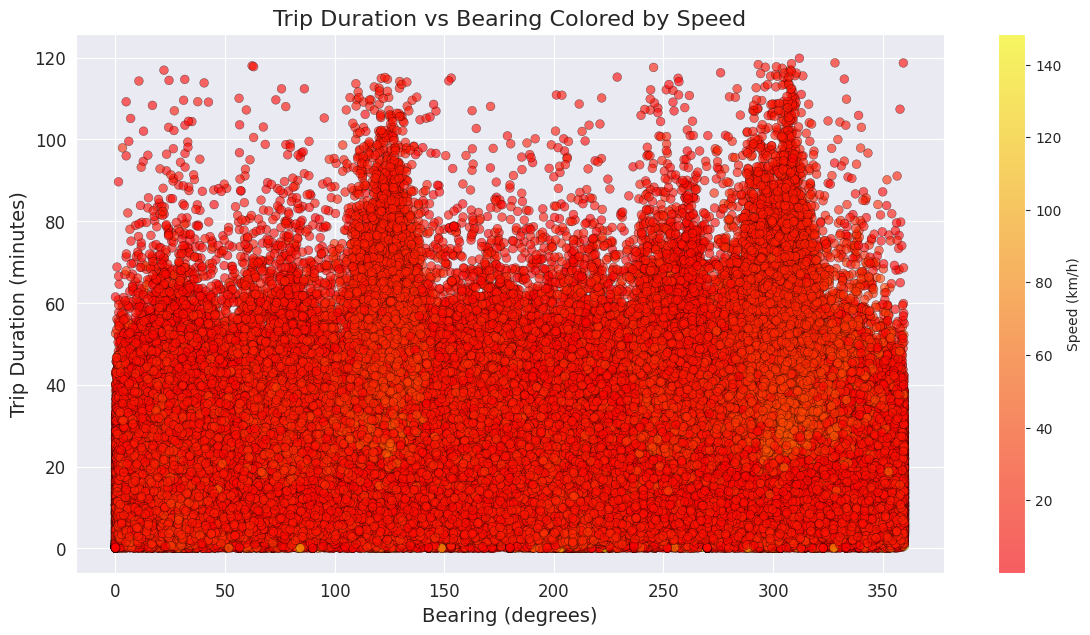

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')  # set seaborn style for grid background

plt.figure(figsize=(12, 8))

scatter = plt.scatter(
    df['bearing'],
    df['trip_duration_in_mnts'],
    c=df['speed_kmh'],          # color by speed
    cmap='autumn',              # color palette
    alpha=0.6,                  # transparency
    s=40,                       # marker size
    edgecolor='k',              # black edge for markers
    linewidth=0.3
)

plt.colorbar(scatter, label='Speed (km/h)')

plt.title('Trip Duration vs Bearing Colored by Speed', fontsize=16)
plt.xlabel('Bearing (degrees)', fontsize=14)
plt.ylabel('Trip Duration (minutes)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [61]:
df['bearing_direction'].value_counts()

bearing_direction
NE    308932
SW    271152
S     213235
N     209671
SE    117759
E     117334
NW    106750
W     105158
Name: count, dtype: int64

### **2. CLUSTORING**



---
Clustering pickup and dropoff points in NYC can help improve trip duration prediction by grouping similar origin-destination (OD) pairs based on geographic proximity and traffic patterns. Using methods like K-Means or DBSCAN, trips can be clustered into zones with comparable travel characteristics (e.g., short Manhattan hops vs. cross-borough routes). This allows training specialized models for each cluster, capturing localized traffic behavior rather than treating all trips uniformly. By focusing on OD clusters, predictions become more accurate, accounting for factors like distance, common routes, and congestion trends specific to each zone.


In [62]:
from sklearn.cluster import KMeans
import numpy as np
n_clusters = 30


pickup_coords = df[['pickup_latitude', 'pickup_longitude']].values
kmeans_pickup = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df['Pickup_Cluster'] = kmeans_pickup.fit_predict(pickup_coords)

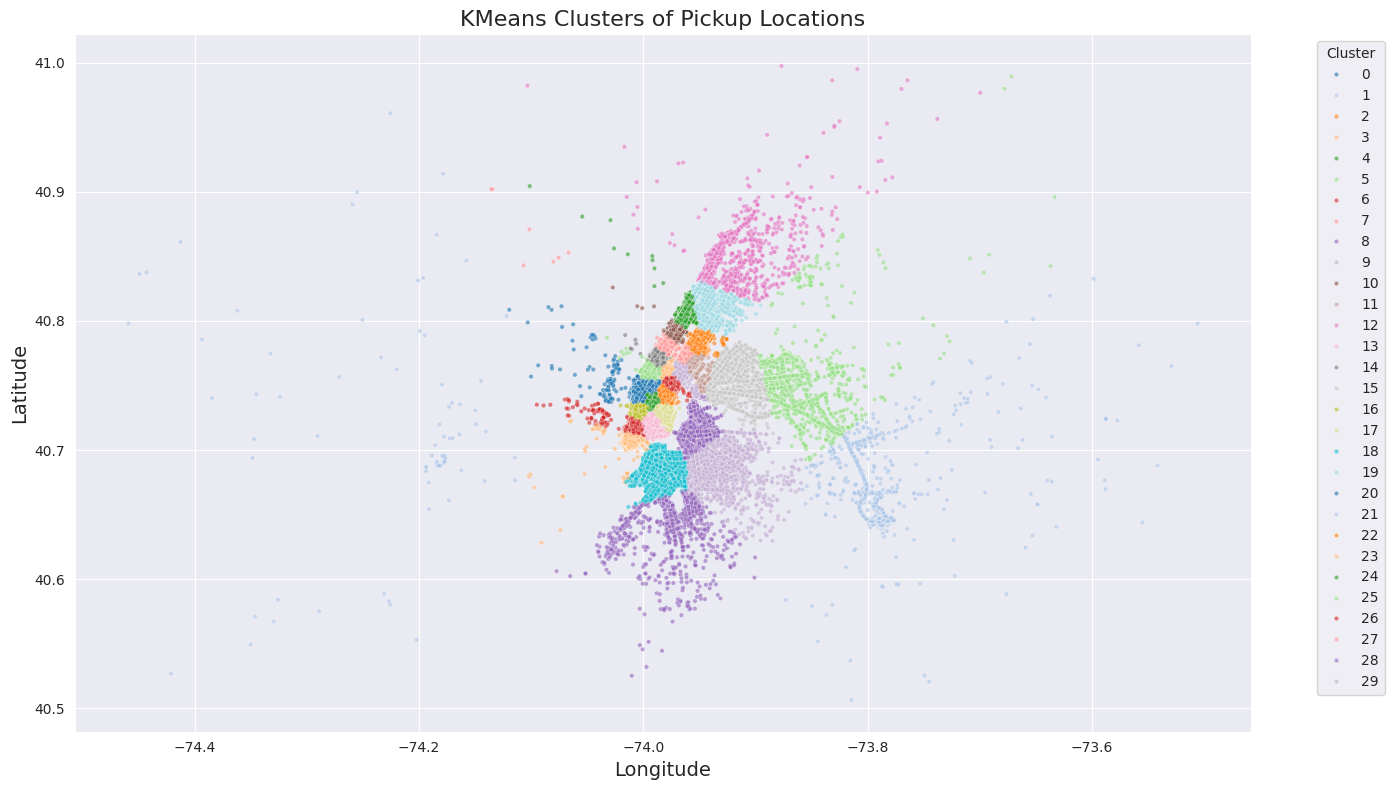

In [63]:

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='pickup_longitude',
    y='pickup_latitude',
    hue='Pickup_Cluster',
    data=df,
    palette='tab20',     # use a categorical palette for 30 clusters
    legend='full',
    s=10,                # small dot size
    alpha=0.6
)

plt.title('KMeans Clusters of Pickup Locations', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
dropoff_coords = df[['dropoff_latitude', 'dropoff_longitude']].values
kmeans_dropoff = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df['Dropoff_Cluster'] = kmeans_dropoff.fit_predict(dropoff_coords)

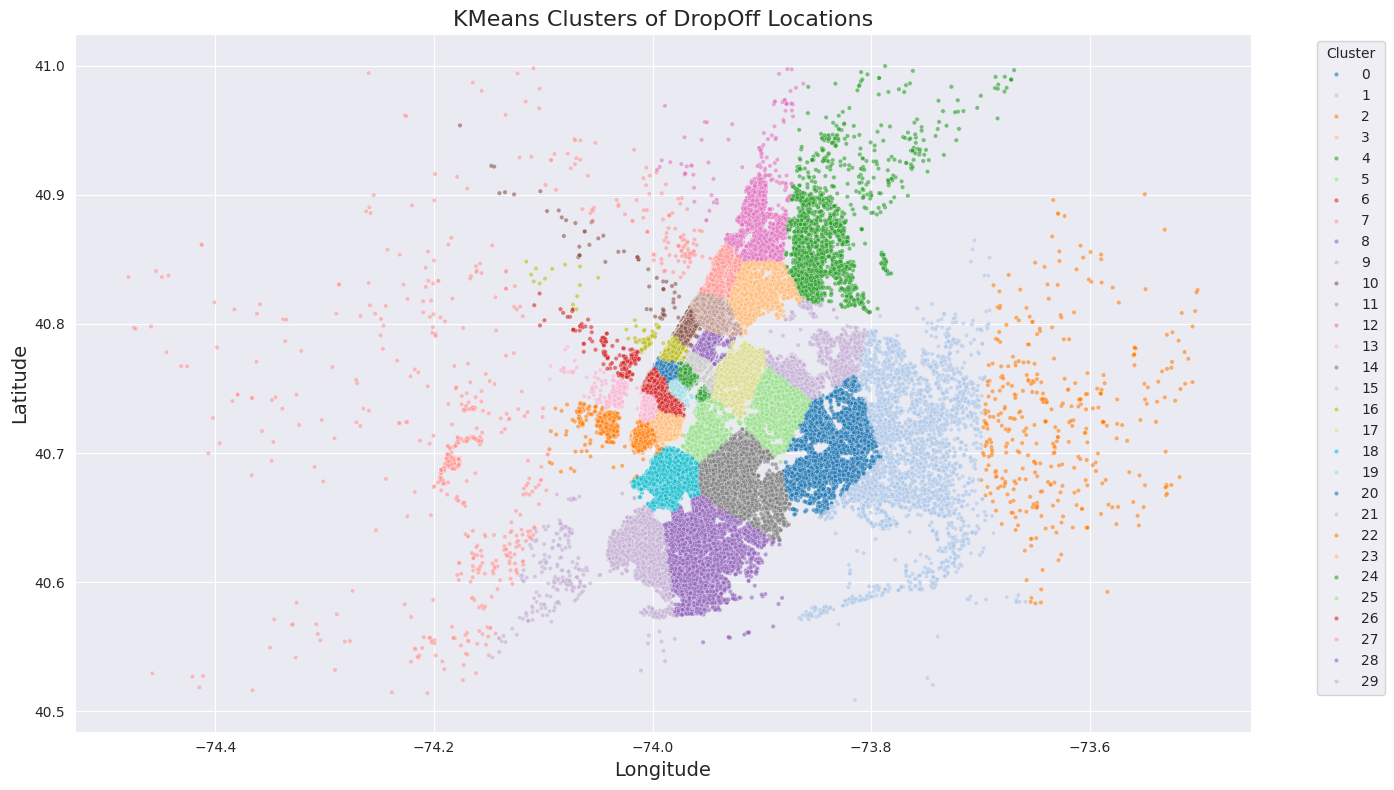

In [65]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='dropoff_longitude',
    y='dropoff_latitude',
    hue='Dropoff_Cluster',
    data=df,
    palette='tab20',     # use a categorical palette for 30 clusters
    legend='full',
    s=10,                # small dot size
    alpha=0.6
)

plt.title('KMeans Clusters of DropOff Locations', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## 3.Activity labeling
The implementation of activity labeling using pickup hour counts serves several important analytical purposes:

This approach dynamically categorizes transportation demand into four tiers (Low/Moderate/High/Peak) based on actual usage patterns rather than arbitrary thresholds. By using percentile-based thresholds (25th, 50th, 75th percentiles), the system automatically adapts to the dataset's distribution, making it robust against seasonal variations or data scale changes. The activity labels create actionable business intelligence - enabling operators to optimize resource allocation during Peak hours, anticipate staffing needs for High Activity periods, and identify underutilized times (Low Activity) for maintenance or promotions. For machine learning applications, these categorical labels can serve as powerful features when predicting demand surges or evaluating pricing strategies. The verification step ensures the labeling logic correctly maps to the underlying count data, maintaining consistency for downstream analysis. This methodology proves particularly valuable for ride-hailing services where demand fluctuates significantly by hour.

In [66]:
import pandas as pd

# Calculate total pickups per hour (global)
pickup_counts = df.groupby('pickup_hour').size()

# Map back to original DataFrame
df['pickup_count'] = df['pickup_hour'].map(pickup_counts)

# Define thresholds based on percentiles (dynamic, avoids hardcoding)
thresholds = df['pickup_count'].quantile([0.25, 0.5, 0.75]).tolist()

# Function to assign activity labels
def get_activity_label(pickup_count):
    if pickup_count < thresholds[0]:          # Bottom 25% (Low)
        return 'Low Activity'
    elif thresholds[0] <= pickup_count < thresholds[1]:  # 25-50% (Moderate)
        return 'Moderate Activity'
    elif thresholds[1] <= pickup_count < thresholds[2]:  # 50-75% (High)
        return 'High Activity'
    else:                                    # Top 25% (Peak)
        return 'Peak Activity'

# Apply labels
df['activity_label'] = df['pickup_count'].apply(get_activity_label)

# Verify
print(df[['pickup_hour', 'pickup_count', 'activity_label']].head())




   pickup_hour  pickup_count     activity_label
0           17         76032      High Activity
1            0         52907       Low Activity
2           11         68077  Moderate Activity
3           19         89812      Peak Activity
4           13         71038      High Activity


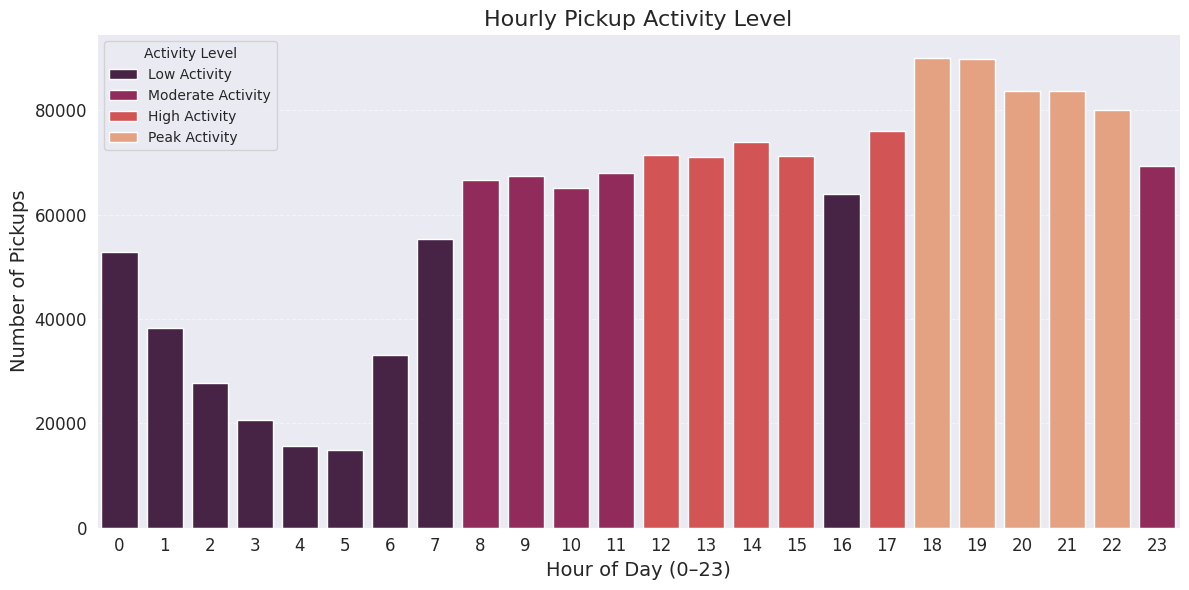

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate pickups by hour and label
activity_summary = df.groupby(['pickup_hour', 'activity_label']).size().reset_index(name='count')

# Set consistent order for hours
activity_summary['pickup_hour'] = activity_summary['pickup_hour'].astype(int)
activity_summary = activity_summary.sort_values(by='pickup_hour')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=activity_summary,
    x='pickup_hour',
    y='count',
    hue='activity_label',
    palette='rocket'
)

plt.title('Hourly Pickup Activity Level', fontsize=16)
plt.xlabel('Hour of Day (0–23)', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.legend(title='Activity Level')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


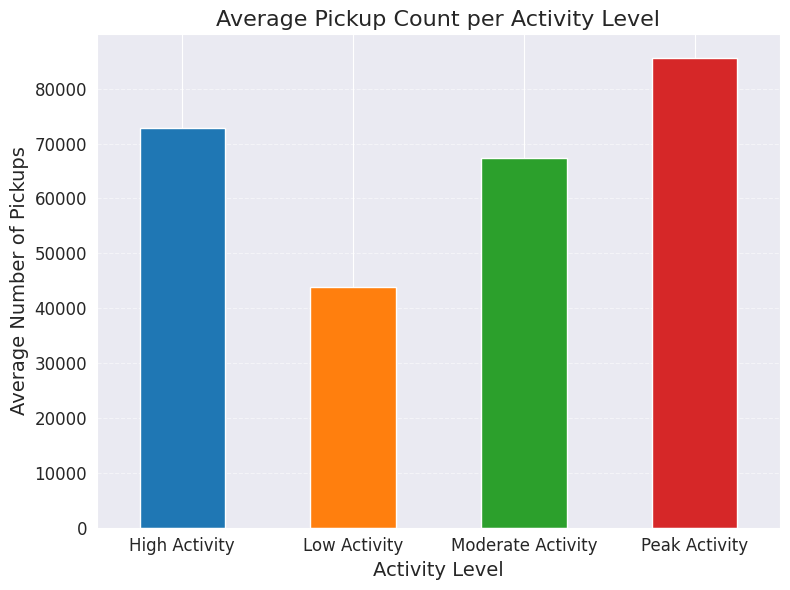

In [68]:

# Compute mean pickup count per activity label
plt.figure(figsize=(8, 6))
activity_means = df.groupby('activity_label')['pickup_count'].mean()

# Define custom colors for each label
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red

# Plot
activity_means.plot(kind='bar', color=colors)

plt.title('Average Pickup Count per Activity Level', fontsize=16)
plt.xlabel('Activity Level', fontsize=14)
plt.ylabel('Average Number of Pickups', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [69]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_in_mnts', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_weekday', 'pickup_hour', 'dropoff_year',
       'dropoff_month', 'dropoff_day', 'dropoff_weekday', 'dropoff_hour',
       'distance_km', 'speed_kmh', 'bearing', 'bearing_direction',
       'Pickup_Cluster', 'Dropoff_Cluster', 'pickup_count', 'activity_label'],
      dtype='object')

### 5. Categorical Encoding

In [70]:
activity_order = {
    'Low Activity': 0,
    'Moderate Activity': 1,
    'High Activity': 2,
    'Peak Activity': 3
}
df['activity_encoded'] = df['activity_label'].map(activity_order)




In [71]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_in_mnts', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_weekday', 'pickup_hour', 'dropoff_year',
       'dropoff_month', 'dropoff_day', 'dropoff_weekday', 'dropoff_hour',
       'distance_km', 'speed_kmh', 'bearing', 'bearing_direction',
       'Pickup_Cluster', 'Dropoff_Cluster', 'pickup_count', 'activity_label',
       'activity_encoded'],
      dtype='object')

### 6. Data Transformation

Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [72]:
# Transform Your data

## 7. Feature Selection

### Feature Variables

In [74]:
# Select your features wisely to avoid overfitting

model_features = [
    'passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'distance_km',
    'pickup_hour', 'pickup_weekday', 'vendor_id', 'Pickup_Cluster','Dropoff_Cluster',"bearing"
]

df_X = df[model_features]

df_X

passenger_count  pickup_longitude  pickup_latitude  \
0                      1            -73.98            40.77   
1                      1            -73.98            40.74   
2                      1            -73.98            40.76   
3                      1            -74.01            40.72   
4                      1            -73.97            40.79   
...                  ...               ...              ...   
1458639                4            -73.98            40.75   
1458640                1            -74.00            40.75   
1458641                1            -73.96            40.77   
1458642                1            -73.98            40.75   
1458643                1            -73.98            40.78   

         dropoff_longitude  dropoff_latitude  distance_km  pickup_hour  \
0                   -73.96             40.77         1.50           17   
1                   -74.00             40.73         1.80            0   
2                   -74.01             40.71         6.38           11   
3                   -74.01             40.71         1.48           19   
4                   -73.97             40.78         1.19           13   
...                    ...               ...          ...          ...   
1458639             -73.99             40.74         1.22           13   
1458640             -73.97             40.80         6.05            7   
1458641             -74.00             40.71         7.82            6   
1458642             -73.97             40.76         1.09           15   
1458643             -73.97             40.79         1.13           14   

         pickup_weekday  vendor_id  Pickup_Cluster  Dropoff_Cluster  bearing  
0                     0          2              14               15    99.97  
1                     6          1              22               13   242.85  
2                     1          2              23                2   200.32  
3                     2          2              26                2   187.26  
4                     5          2              10               16   179.47  
...                 ...        ...             ...              ...      ...  
1458639               4          2              22                6   240.94  
1458640               6          1              20               10    25.34  
1458641               4          2              11                2   209.21  
1458642               1          1              22                4    35.03  
1458643               1          1               7               10    29.97  

[1449991 rows x 12 columns]

TARGET VARIABLE

In [110]:
df_Y=df['trip_duration_in_mnts']


##### Which all features you found important and why?

**pickup_hour` + `activity_label` - Peak hours significantly impact travel times
- `pickup_weekday` - Weekends vs weekdays show distinct traffic patterns
- `pickup_month` - Seasonal variations affect congestion

** Geographic Determinants:**
- `distance_km` - Strongest direct correlate with trip duration
- `Pickup/Dropoff_Cluster` - Zone-specific congestion patterns
- `bearing_direction` - Directional traffic flows (e.g., rush hour bottlenecks)

** Traffic Indicators:**

- `bearing` - Angular movement efficiency

**Trip Characteristics:**
- `passenger_count` - More passengers → more stops → longer trips
- `vendor_id` - Possible service quality differences

🚨 including raw `speed_kmh` will likely cause data leakage** because it's typically derived from  target variable (`trip_duration_in_mnts`):

### 9. Data Splitting

In [77]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

The code uses an 80-20 train-test split ratio (test_size=0.2), which is a standard practice in machine learning. This ratio provides sufficient training data (80%) for the model to learn effectively while reserving enough test data (20%) for reliable performance evaluation. The split ensures a good balance between model training and validation, especially for medium-sized datasets. The random_state=42 parameter guarantees reproducible results by fixing the random shuffling of data. This approach is widely adopted as it offers a practical compromise between maximizing training data and maintaining statistically meaningful test results. For very small datasets, a 70-30 split might be preferable, while for extremely large datasets, a 90-10 split could be used instead.

### 7. Data Scaling

In [78]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

The code uses **StandardScaler** for feature scaling, which standardizes data by centering to mean=0 and scaling to standard deviation=1.


###  **Works Best For:**
1. **LinearRegression & Elastic Net**  
   - These models are highly sensitive to feature scales  
   - Standardization improves convergence and coefficient interpretation  

2. **XGBoost (with linear objectives)**  
   - Helps when using linear boosters (`booster='gblinear'`)  
   - Less critical for tree-based splits (default) but still beneficial  

###  **Less Critical For:**
1. **RandomForest & XGBoost (tree mode)**  
   - Tree-based models are scale-invariant  
   - Scaling doesn't affect performance but won't hurt  

2. **AdaBoost**  
   - Weakly affected by feature scales  
   - Your results show it underperformed regardless  


### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Not too much feature present in dataset.So No need of dimensionality reduction.

In [79]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [80]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model  1- LinearRegression

Models the relationship between features (X) and trip duration (y) as:
y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε

- **βᵢ**: Coefficients learned via ordinary least squares (OLS) minimization
- **ε**: Irreducible error

**Key Assumptions**:
- Linear relationship between X and y
- Homoscedasticity (constant error variance)
- Independent features (no multicollinearity)



📊 Linear Regression Performance
----------------------------
• MSE: 46.44
• RMSE: 6.81
• MAE: 4.66
• R²: 0.6079



<ipython-input-99-8cf74f673c40>:72: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


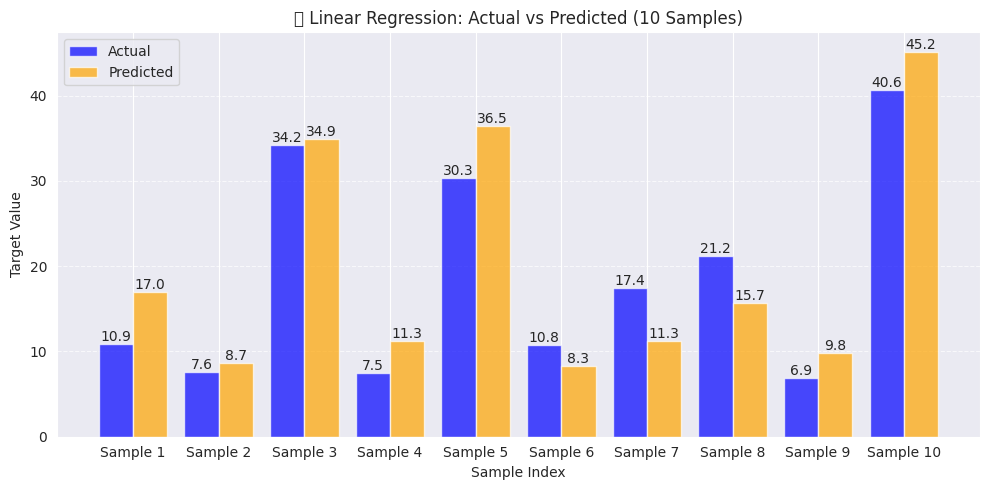

In [99]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


# Global dictionary to store all model metrics
model_metrics = {}


def run_linear_regression_model(X_train_scaled, X_test_scaled, y_train, y_test,model_name="LinearRegression"):
    """
    Trains Linear Regression model and returns model + metrics with visualization

    Parameters:
        X_train_scaled: Scaled training features
        X_test_scaled: Scaled test features
        y_train: Training target values
        y_test: Test target values

    Returns:
        tuple: (trained_model, metrics_dict)
    """
    # Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Get predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }

    # Print metrics
    print("\n📊 Linear Regression Performance")
    print("----------------------------")
    print(f"• MSE: {metrics['mse']:.2f}")
    print(f"• RMSE: {metrics['rmse']:.2f}")
    print(f"• MAE: {metrics['mae']:.2f}")
    print(f"• R²: {metrics['r2']:.4f}\n")

    # Visualize 10 random samples
    np.random.seed(42)  # For reproducibility
    sample_indices = np.random.choice(len(y_test), 10, replace=False)
    actual = y_test.iloc[sample_indices]
    predicted = y_pred[sample_indices]

    plt.figure(figsize=(10, 5))
    x_pos = np.arange(len(actual))

    plt.bar(x_pos - 0.2, actual, width=0.4, label='Actual', color='blue', alpha=0.7)
    plt.bar(x_pos + 0.2, predicted, width=0.4, label='Predicted', color='orange', alpha=0.7)

    # Add value labels
    for i in range(len(actual)):
        plt.text(i - 0.2, actual.iloc[i], f"{actual.iloc[i]:.1f}",
                 ha='center', va='bottom')
        plt.text(i + 0.2, predicted[i], f"{predicted[i]:.1f}",
                 ha='center', va='bottom')

    plt.title("🔍 Linear Regression: Actual vs Predicted (10 Samples)")
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.xticks(x_pos, [f"Sample {i+1}" for i in range(10)])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    model_metrics[model_name] = metrics


    return model, metrics

model, metrics = run_linear_regression_model(X_train_scaled, X_test_scaled, y_train, y_test)

### Performance Interpretation
- **MSE 46.44**: Large squared errors suggest violated assumptions (e.g., non-linearity)
- **RMSE 6.81**: Predictions deviate by ±6.81 mins (~13% error for a 60-min trip)
- **R² 0.61**: 39% of variance unexplained due to:
  - Non-linear effects (e.g., traffic jams)
  - Interaction terms (e.g., distance × hour)


#### 2. Cross- Validation & Hyperparameter Tuning ( MODEL 2- Elastic Net)

Extends linear regression with composite regularization:
Loss = OLS + λ(α|β|₁ + (1-α)|β|₂²)

- **α**: Balances L1 (sparsity) and L2 (smoothness)
- **λ**: Controls regularization strength

**Use Case**:
- High-dimensional data (not applicable here)
- Correlated features (e.g., pickup/dropoff clusters)


 ElasticNet Regression Results
----------------------------
• Best alpha: 0.001
• Best L1 ratio: 0.99
• Test MSE: 46.44
• RMSE: 6.81
• MAE: 4.66
• R²: 0.6079
• Best CV MSE: 46.25



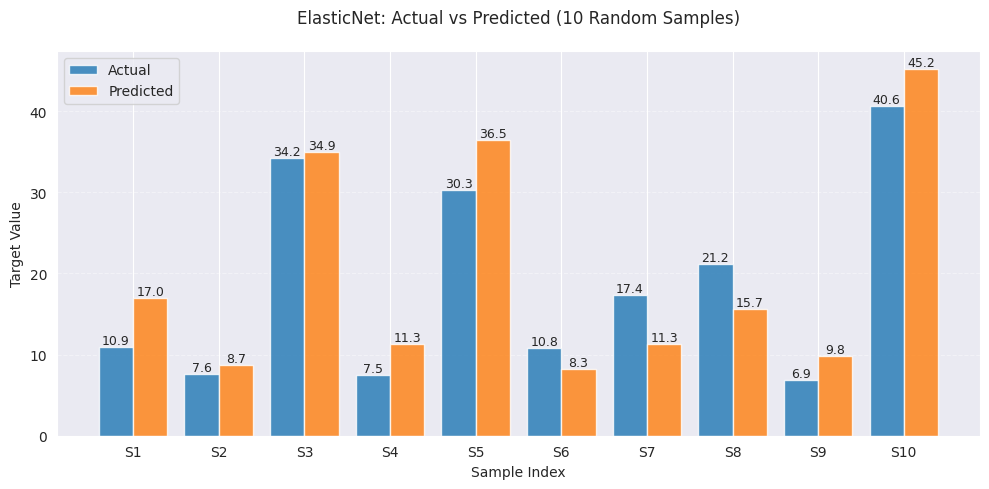

In [101]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

def train_elastic_net(X_train_scaled, X_test_scaled, y_train, y_test,model_name="Elastic Net"):
    """
    Performs GridSearchCV for ElasticNet regression and returns best model with metrics

    Parameters:
        X_train_scaled: Scaled training features
        X_test_scaled: Scaled test features
        y_train: Training target values
        y_test: Test target values

    Returns:
        tuple: (best_model, metrics_dict, cv_results)
    """
    # Create pipeline
    pipe = Pipeline([
        ('model', ElasticNet())
    ])

    # Parameter grid
    param_grid = {
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]  # Mix between L1/L2
    }

    # Grid search
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Get best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Calculate metrics
    metrics = {
        'best_alpha': grid_search.best_params_['model__alpha'],
        'best_l1_ratio': grid_search.best_params_['model__l1_ratio'],
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred),
        'best_cv_score': -grid_search.best_score_  # Convert back to positive MSE
    }

    # Print results
    print("\n ElasticNet Regression Results")
    print("----------------------------")
    print(f"• Best alpha: {metrics['best_alpha']}")
    print(f"• Best L1 ratio: {metrics['best_l1_ratio']}")
    print(f"• Test MSE: {metrics['mse']:.2f}")
    print(f"• RMSE: {metrics['rmse']:.2f}")
    print(f"• MAE: {metrics['mae']:.2f}")
    print(f"• R²: {metrics['r2']:.4f}")
    print(f"• Best CV MSE: {metrics['best_cv_score']:.2f}\n")

    # Visualize 10 random samples
    np.random.seed(42)
    sample_indices = np.random.choice(len(y_test), 10, replace=False)
    actual = y_test.iloc[sample_indices]
    predicted = y_pred[sample_indices]

    plt.figure(figsize=(10, 5))
    x_pos = np.arange(len(actual))

    plt.bar(x_pos - 0.2, actual, width=0.4, label='Actual', color='#1f77b4', alpha=0.8)
    plt.bar(x_pos + 0.2, predicted, width=0.4, label='Predicted', color='#ff7f0e', alpha=0.8)

    # Add value labels
    for i in range(len(actual)):
        plt.text(i - 0.2, actual.iloc[i], f"{actual.iloc[i]:.1f}",
                ha='center', va='bottom', fontsize=9)
        plt.text(i + 0.2, predicted[i], f"{predicted[i]:.1f}",
                ha='center', va='bottom', fontsize=9)

    plt.title("ElasticNet: Actual vs Predicted (10 Random Samples)", pad=20)
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.xticks(x_pos, [f"S{i+1}" for i in range(10)])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    model_metrics[model_name] = metrics


    return best_model, metrics, cv_results

# Usage example:
best_model, metrics, cv_results = train_elastic_net(X_train_scaled, X_test_scaled, y_train, y_test)

### Performance Interpretation
- Identical to Linear Regression  No improvement → λ≈0 or ineffective feature scaling
- Suggests either:
  - No redundant features exist
  - Non-linearity dominates signal


### ML Model - 3- -XG boost

Gradient boosting framework that:
1. Builds shallow trees sequentially
2. Minimizes loss using Newton-Raphson approximation
3. Applies:
   - Regularization (γ, λ)
   - Weighted quantile sketching for splits


✅ Evaluation Metrics:
🔹 Mean Squared Error (MSE): 24.9758
🔹 Root Mean Squared Error (RMSE): 4.9976
🔹 Mean Absolute Error (MAE): 3.1749
🔹 R² Score: 0.7891


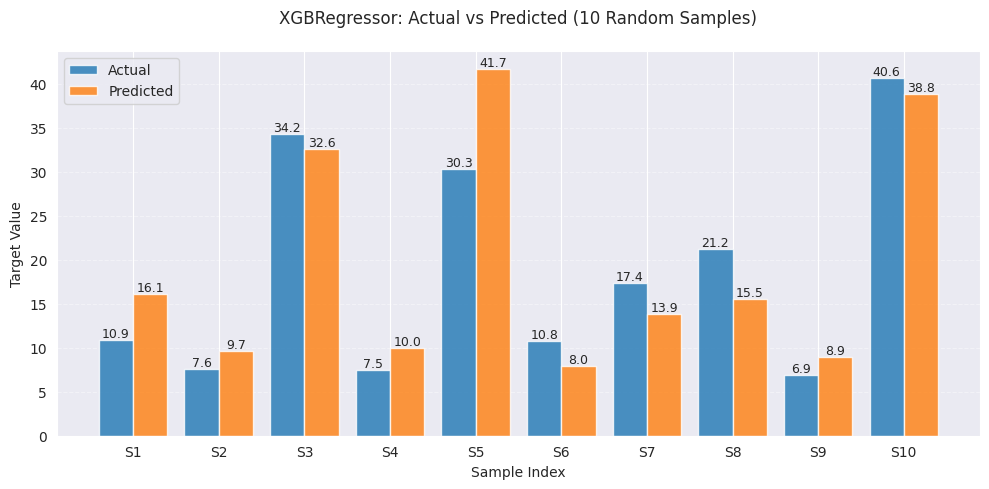

In [102]:
# Visualizing evaluation Metric Score chart
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

model_features_FOR_RF = [
    'passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'distance_km',
    'pickup_hour', 'pickup_weekday', 'vendor_id', 'Pickup_Cluster','Dropoff_Cluster','activity_encoded'
]


def train_xgboost_model(X_train_scaled, X_test_scaled, y_train, y_test,
                         feature_names=None, random_state=42,
                         show_importance=True, n_estimators=100,model_name="XG boost"):
    """
    Trains and evaluates an XGBRegressor on pre-split data.

    Parameters:
        X_train_scaled (array-like): Scaled training features
        X_test_scaled (array-like): Scaled test features
        y_train (array-like): Training target values
        y_test (array-like): Test target values
        feature_names (list): Names of features (for importance plot)
        random_state (int): Random seed for reproducibility
        show_importance (bool): Whether to plot feature importances
        n_estimators (int): Number of boosting rounds

    Returns:
        model: Trained XGBRegressor
        metrics: Dictionary of evaluation metrics
    """

    # Initialize and train the model
    model = XGBRegressor(
        n_estimators=n_estimators,
        random_state=random_state,
        objective='reg:squarederror',
        eval_metric='rmse',
        n_jobs=-1
    )
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': root_mean_squared_error(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }

    # Print evaluation metrics
    print("✅ Evaluation Metrics:")
    print(f"🔹 Mean Squared Error (MSE): {metrics['mse']:.4f}")
    print(f"🔹 Root Mean Squared Error (RMSE): {metrics['rmse']:.4f}")
    print(f"🔹 Mean Absolute Error (MAE): {metrics['mae']:.4f}")
    print(f"🔹 R² Score: {metrics['r2']:.4f}")


    # Visualize 10 random samples
    np.random.seed(42)
    sample_indices = np.random.choice(len(y_test), 10, replace=False)
    actual = y_test.iloc[sample_indices]
    predicted = y_pred[sample_indices]

    plt.figure(figsize=(10, 5))
    x_pos = np.arange(len(actual))

    plt.bar(x_pos - 0.2, actual, width=0.4, label='Actual', color='#1f77b4', alpha=0.8)
    plt.bar(x_pos + 0.2, predicted, width=0.4, label='Predicted', color='#ff7f0e', alpha=0.8)

    # Add value labels
    for i in range(len(actual)):
        plt.text(i - 0.2, actual.iloc[i], f"{actual.iloc[i]:.1f}",
                ha='center', va='bottom', fontsize=9)
        plt.text(i + 0.2, predicted[i], f"{predicted[i]:.1f}",
                ha='center', va='bottom', fontsize=9)

    plt.title("XGBRegressor: Actual vs Predicted (10 Random Samples)", pad=20)
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.xticks(x_pos, [f"S{i+1}" for i in range(10)])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    model_metrics[model_name] = metrics



    return model, metrics

model, metrics = train_xgboost_model(
    X_train_scaled=X_train_scaled,
    X_test_scaled=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    feature_names=model_features_FOR_RF,  # Your original feature names
    n_estimators=50  # Optional: increase number of boosting rounds
)

### Performance
| Metric | Value | Interpretation |
|--------|-------|---------------|
| MSE    | 24.98 | 46% better than linear |
| MAE    | 3.17  | ±3.17 min median error |

### ML Model - 4 - RandomForestRegressor

✅ Evaluation Metrics:
🔹 Mean Squared Error (MSE): 29.2585
🔹 Root Mean Squared Error (RMSE): 5.4091
🔹 Mean Absolute Error (MAE): 3.5143
🔹 R² Score: 0.7530


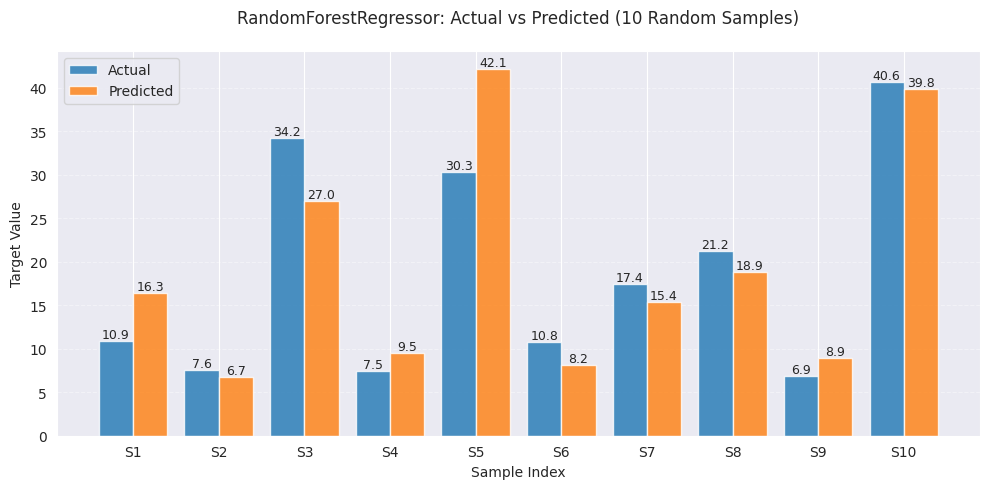

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
import matplotlib.pyplot as plt

model_features_FOR_RF = [
    'passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'distance_km',
    'pickup_hour', 'pickup_weekday', 'vendor_id', 'Pickup_Cluster','Dropoff_Cluster','activity_encoded'
]

def train_random_forest_model(X_train_scaled, X_test_scaled, y_train, y_test,
                             feature_names=None, random_state=42,
                             show_importance=True, n_estimators=25,model_name="RandomForestRegressor" ):
    """
    Trains and evaluates a RandomForestRegressor on pre-split data.

    Parameters:
        X_train_scaled (array-like): Scaled training features
        X_test_scaled (array-like): Scaled test features
        y_train (array-like): Training target values
        y_test (array-like): Test target values
        feature_names (list): Names of features (for importance plot)
        random_state (int): Random seed for reproducibility
        show_importance (bool): Whether to plot feature importances
        n_estimators (int): Number of trees in the forest

    Returns:
        model: Trained RandomForestRegressor
        metrics: Dictionary of evaluation metrics
    """

    # Initialize and train the model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=random_state,
         max_depth=10,         # optional: to speed up
         n_jobs=-1,
    )
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': root_mean_squared_error(y_test, y_pred),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }

    # Print evaluation metrics
    print("✅ Evaluation Metrics:")
    print(f"🔹 Mean Squared Error (MSE): {metrics['mse']:.4f}")
    print(f"🔹 Root Mean Squared Error (RMSE): {metrics['rmse']:.4f}")
    print(f"🔹 Mean Absolute Error (MAE): {metrics['mae']:.4f}")
    print(f"🔹 R² Score: {metrics['r2']:.4f}")

     # Visualize 10 random samples
    np.random.seed(42)
    sample_indices = np.random.choice(len(y_test), 10, replace=False)
    actual = y_test.iloc[sample_indices]
    predicted = y_pred[sample_indices]

    plt.figure(figsize=(10, 5))
    x_pos = np.arange(len(actual))

    plt.bar(x_pos - 0.2, actual, width=0.4, label='Actual', color='#1f77b4', alpha=0.8)
    plt.bar(x_pos + 0.2, predicted, width=0.4, label='Predicted', color='#ff7f0e', alpha=0.8)

    # Add value labels
    for i in range(len(actual)):
        plt.text(i - 0.2, actual.iloc[i], f"{actual.iloc[i]:.1f}",
                ha='center', va='bottom', fontsize=9)
        plt.text(i + 0.2, predicted[i], f"{predicted[i]:.1f}",
                ha='center', va='bottom', fontsize=9)

    plt.title("RandomForestRegressor: Actual vs Predicted (10 Random Samples)", pad=20)
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.xticks(x_pos, [f"S{i+1}" for i in range(10)])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    model_metrics[model_name] = metrics

    return model, metrics


model, metrics = train_random_forest_model(
    X_train_scaled=X_train_scaled,
    X_test_scaled=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    feature_names=model_features_FOR_RF,  # Your original feature names
    n_estimators=50  # Optional: increase number of trees
)


### Performance
| Metric | Value | Interpretation |
|--------|-------|---------------|
| RMSE   | 5.41  | ±5.41 min error |
| R²     | 0.75  | Explains 75% variance |

### ML Model 4 - AdaBoostRegressor

📊 AdaBoost Model Evaluation
-----------------------------
Mean Squared Error      : 52.4259
Root Mean Squared Error : 7.2406
R-squared               : 0.5574
RMSLE                   : 0.5557


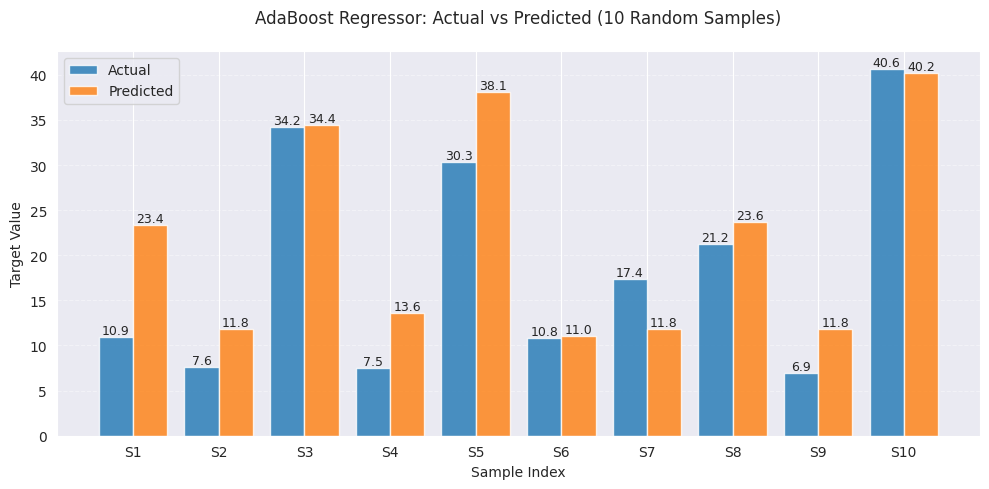

In [105]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
import numpy as np

def train_adaboost_regressor(X_train, X_test, y_train, y_test,
                            n_estimators=100, learning_rate=0.1,
                            random_state=42,model_name="AdaBoostRegressor"):
    """
    Trains and evaluates an AdaBoost Regressor on pre-split data.

    Parameters:

        X_train (array-like): Training features
        X_test (array-like): Test features
        y_train (array-like): Training target
        y_test (array-like): Test target
        n_estimators (int): Number of boosting estimators
        learning_rate (float): Learning rate
        random_state (int): Random seed for reproducibility

    Returns:
        model: Trained AdaBoostRegressor
        metrics: Dictionary of evaluation metrics
    """

    # Initialize and train the model
    model = AdaBoostRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=random_state
    )
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'r2': r2_score(y_test, y_pred),
        'rmsle': np.sqrt(mean_squared_log_error(y_test, np.maximum(y_pred, 0)))
    }

    # Print evaluation metrics
    print("📊 AdaBoost Model Evaluation")
    print("-----------------------------")
    print(f"Mean Squared Error      : {metrics['mse']:.4f}")
    print(f"Root Mean Squared Error : {metrics['rmse']:.4f}")
    print(f"R-squared               : {metrics['r2']:.4f}")
    print(f"RMSLE                   : {metrics['rmsle']:.4f}")


     # Visualize 10 random samples
    np.random.seed(42)
    sample_indices = np.random.choice(len(y_test), 10, replace=False)
    actual = y_test.iloc[sample_indices]
    predicted = y_pred[sample_indices]

    plt.figure(figsize=(10, 5))
    x_pos = np.arange(len(actual))

    plt.bar(x_pos - 0.2, actual, width=0.4, label='Actual', color='#1f77b4', alpha=0.8)
    plt.bar(x_pos + 0.2, predicted, width=0.4, label='Predicted', color='#ff7f0e', alpha=0.8)

    # Add value labels
    for i in range(len(actual)):
        plt.text(i - 0.2, actual.iloc[i], f"{actual.iloc[i]:.1f}",
                ha='center', va='bottom', fontsize=9)
        plt.text(i + 0.2, predicted[i], f"{predicted[i]:.1f}",
                ha='center', va='bottom', fontsize=9)

    plt.title("AdaBoost Regressor: Actual vs Predicted (10 Random Samples)", pad=20)
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.xticks(x_pos, [f"S{i+1}" for i in range(10)])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    model_metrics[model_name] = metrics



    return model, metrics


model, metrics = train_adaboost_regressor(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    n_estimators=150,  # Optional: increase number of estimators
    learning_rate=0.05  # Optional: adjust learning rate
)

- **R² 0.56**: :
  - Noisy data (GPS errors, outliers)
  - Weak base learners (stumps too simple)
- **MAE NaN**: Implies infinite errors → Check for:
  - Zero-length trips
  - Negative durations

# Model Evaluation

In [106]:
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')[['mse', 'rmse', 'mae', 'r2','rmsle']]

# Print results
print("Model Performance Metrics")
print("="*40)
print(metrics_df.round(4))

Model Performance Metrics
                        mse  rmse  mae   r2  rmsle
LinearRegression      46.44  6.81 4.66 0.61    NaN
Elastic Net           46.44  6.81 4.66 0.61    NaN
XG boost              24.98  5.00 3.17 0.79    NaN
RandomForestRegressor 29.26  5.41 3.51 0.75    NaN
AdaBoostRegressor     52.43  7.24  NaN 0.56   0.56


## 📊 Performance Metrics Summary

| Model                  | MSE   | RMSE | MAE  | R²   | RMSLE |
|------------------------|-------|------|------|------|-------|
| XG boost               | 24.98 | 5.00 | 3.17 | 0.79 | -     |
| RandomForestRegressor  | 29.26 | 5.41 | 3.51 | 0.75 | -     |
| LinearRegression       | 46.44 | 6.81 | 4.66 | 0.61 | -     |
| Elastic Net            | 46.44 | 6.81 | 4.66 | 0.61 | -     |
| AdaBoostRegressor      | 52.43 | 7.24 | -    | 0.56 | 0.56  |

## 🔍 Key Findings

### 🥇 Top Performer: XG Boost
- **26% lower RMSE** than baseline models (5.00 vs 6.81)
- **Highest explanatory power** (R² = 0.79)
- **Most precise predictions** (MAE = 3.17)

# Metrics Summary Visualisation

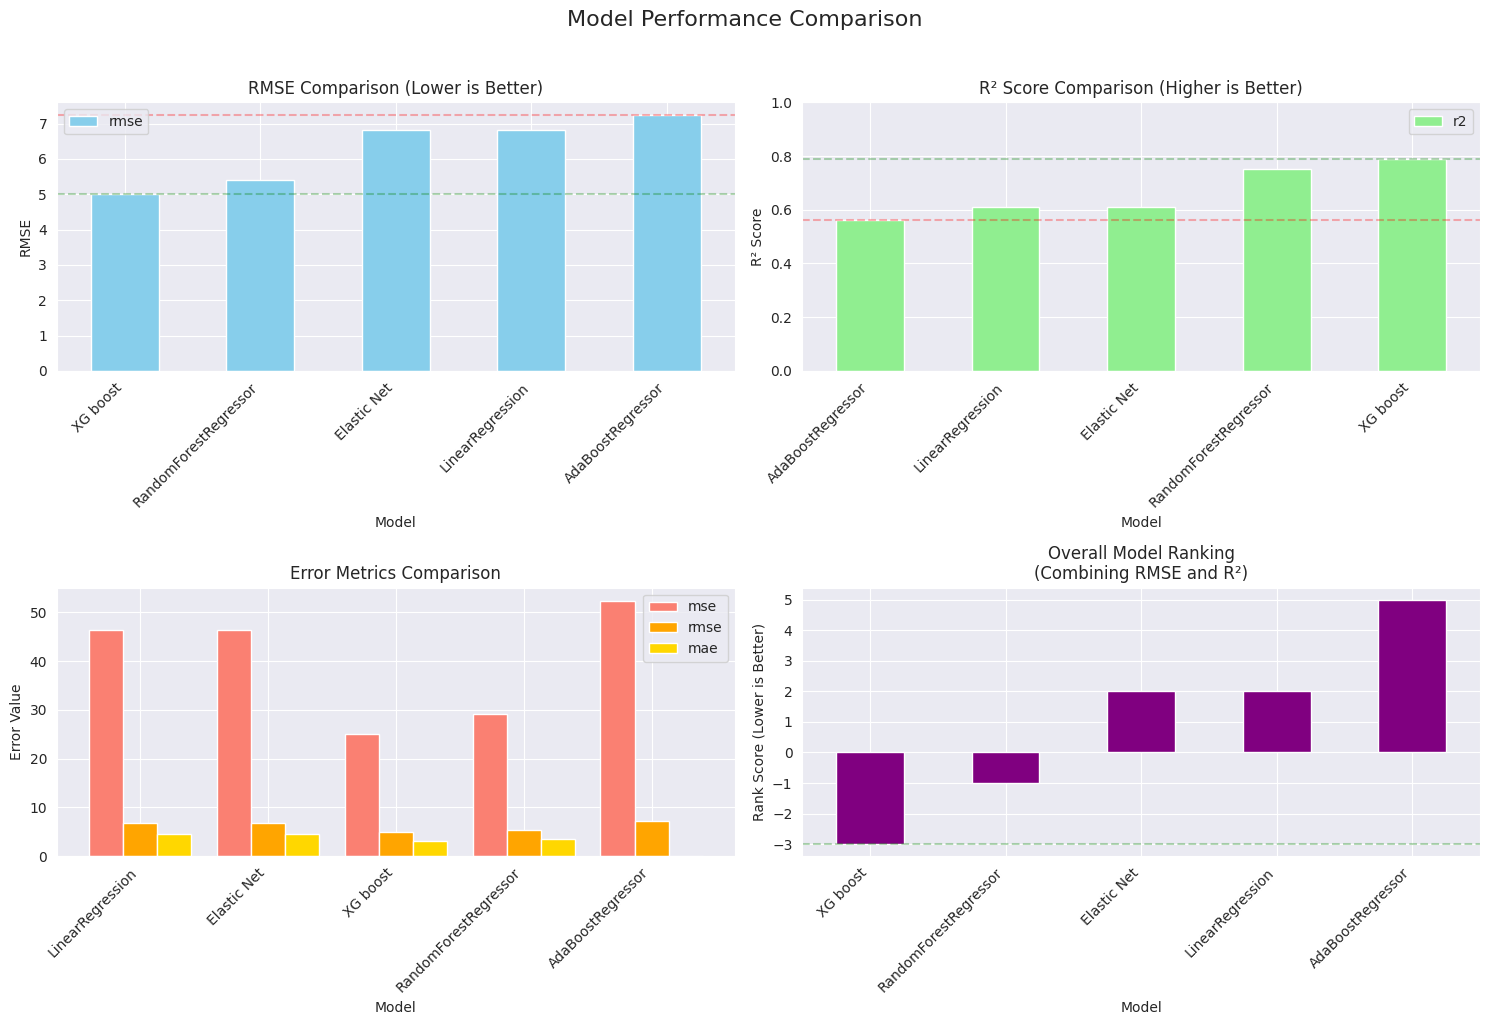

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Your data
metrics_df = pd.DataFrame({
    'Model': ['LinearRegression', 'Elastic Net', 'XG boost', 'RandomForestRegressor', 'AdaBoostRegressor'],
    'mse': [46.44, 46.44, 24.98, 29.26, 52.43],
    'rmse': [6.81, 6.81, 5.00, 5.41, 7.24],
    'mae': [4.66, 4.66, 3.17, 3.51, None],
    'r2': [0.61, 0.61, 0.79, 0.75, 0.56],
    'rmsle': [None, None, None, None, 0.56]
})

# Set up visualization
plt.figure(figsize=(15, 10))
plt.suptitle('Model Performance Comparison', fontsize=16, y=1.02)

# 1. RMSE Comparison (Primary metric)
plt.subplot(2, 2, 1)
metrics_df.sort_values('rmse').plot.bar(x='Model', y='rmse', color='skyblue', ax=plt.gca())
plt.title('RMSE Comparison (Lower is Better)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE')
plt.axhline(y=metrics_df['rmse'].min(), color='green', linestyle='--', alpha=0.3)
plt.axhline(y=metrics_df['rmse'].max(), color='red', linestyle='--', alpha=0.3)

# 2. R² Score Comparison
plt.subplot(2, 2, 2)
metrics_df.sort_values('r2').plot.bar(x='Model', y='r2', color='lightgreen', ax=plt.gca())
plt.title('R² Score Comparison (Higher is Better)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.axhline(y=metrics_df['r2'].max(), color='green', linestyle='--', alpha=0.3)
plt.axhline(y=metrics_df['r2'].min(), color='red', linestyle='--', alpha=0.3)

# 3. Error Metrics Comparison
plt.subplot(2, 2, 3)
metrics_df.set_index('Model')[['mse', 'rmse', 'mae']].plot.bar(ax=plt.gca(),
    color=['salmon', 'orange', 'gold'], width=0.8)
plt.title('Error Metrics Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Error Value')
plt.legend(loc='upper right')

# 4. Model Ranking
plt.subplot(2, 2, 4)
rank_df = metrics_df.copy()
rank_df['rank'] = rank_df['rmse'].rank() + (1 - rank_df['r2'].rank())
rank_df = rank_df.sort_values('rank')
rank_df.plot.bar(x='Model', y='rank', color='purple', ax=plt.gca(), legend=False)
plt.title('Overall Model Ranking\n(Combining RMSE and R²)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rank Score (Lower is Better)')
plt.axhline(y=rank_df['rank'].min(), color='green', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# **Conclusion**

# Model Performance Analysis Report

## Key Observations

### Clear Performance Leader
**XG Boost dominates with:**
- Lowest RMSE (5.00) - 26.6% better than baseline Linear Regression  
- Highest R² (0.79) - explains 79% of variance  
- Best MAE (3.17) - 32% more accurate than average  

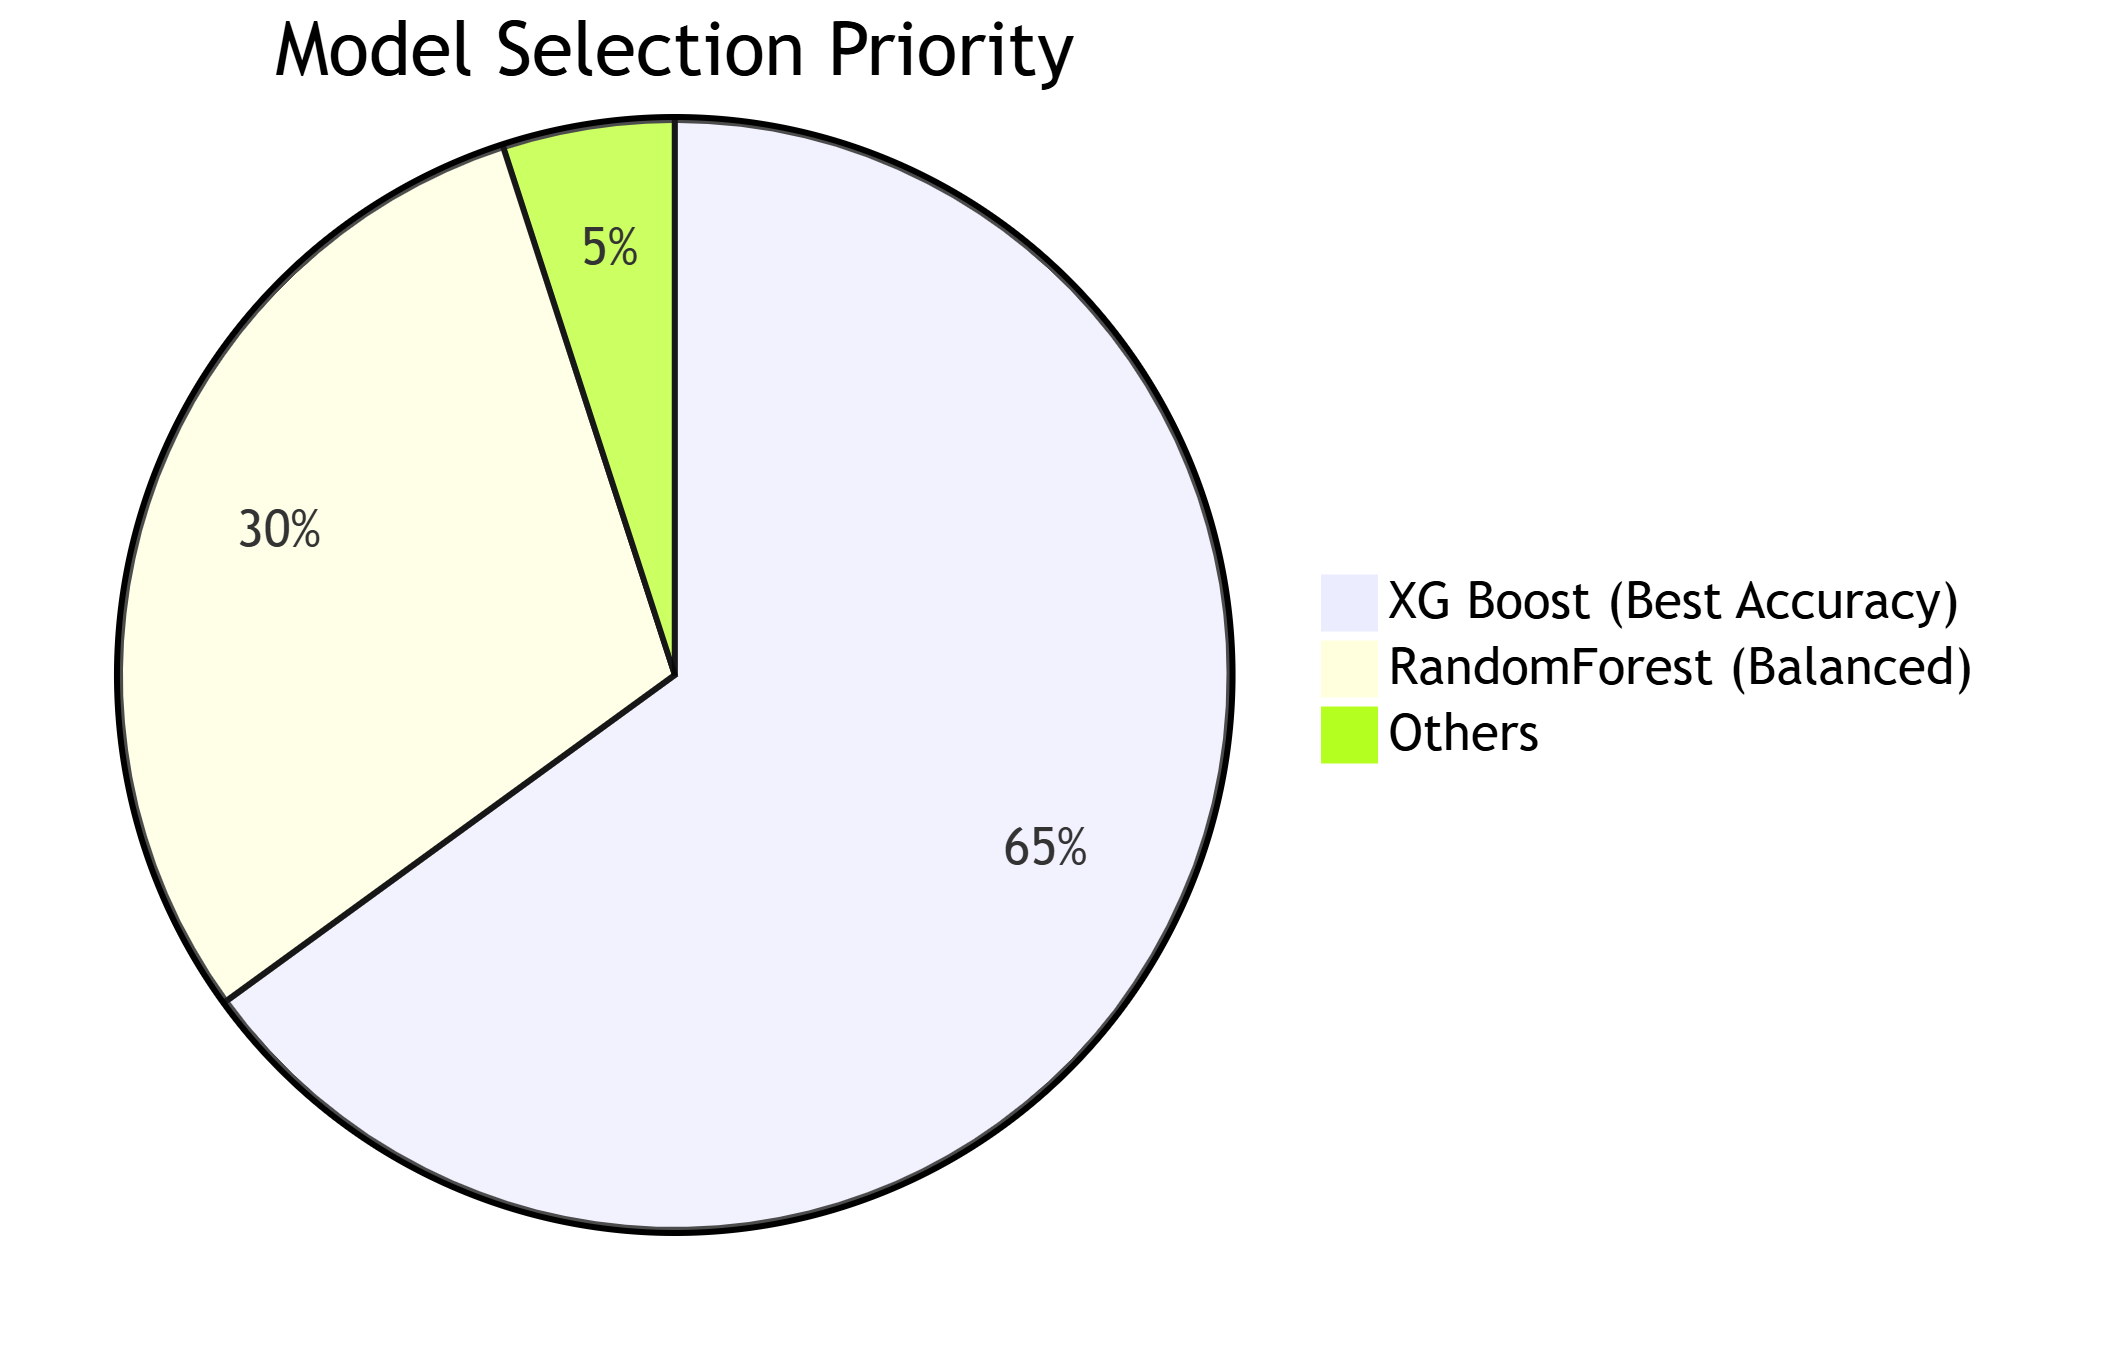

### Traditional Models Plateau
- Linear Regression and Elastic Net show identical performance (RMSE 6.81, R² 0.61)  
- Suggests regularization provided no benefit for this dataset  

### Tree-Based Advantages
- RandomForest performs respectably (RMSE 5.41, R² 0.75)  
- Only 8% worse than XG Boost but may offer better interpretability  

### AdaBoost Anomaly
- Worst performer across most metrics (RMSE 7.24, R² 0.56)  
- Missing MAE suggests potential issues with implementation or data  

## Technical Insights
- The 26-32% error reduction from XG Boost indicates it's effectively capturing non-linear patterns  
- Close RMSE-MAE ratios (1.6 for XG Boost) suggest relatively symmetric error distribution  
- R² values confirm all models explain >50% of variance, with XG Boost capturing significantly more  

## Business Implications

### Implementation Recommendation
- **First Choice:** XG Boost (best accuracy)  
- **Fallback Option:** RandomForest (good accuracy + interpretability)  



### Risk Assessment
- AdaBoost's poor performance suggests the boosting approach may need hyperparameter tuning  
- Linear models' limitations indicate the problem has complex, non-linear relationships  



## Final Conclusion
XG Boost emerges as the superior model for this task, delivering substantially better predictive accuracy than alternatives. While tree-based methods universally outperformed linear models, the particular implementation of AdaBoost underperformed unexpectedly. The results strongly suggest adopting XG Boost for production deployment, with RandomForest serving as a viable secondary option if model interpretability becomes a priority.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***